# Make Plots 

In [8]:
# imports
from functions import *
import matplotlib as mpl
import matplotlib.dates as dates
from matplotlib.dates import DateFormatter
import os
import pandas as pd
import matplotlib.pyplot as plt

### INPUT

In [9]:
# list the locations you want to generate plots for 

my_locs = ['Rolla', 'MAC', 'SEMO', 'Timberlane', 'Ozark', 'Ozark_II', 
           'Perryville', 'Overland', 'Hillsboro', 'Science Center', 
           'Magruder Hall', 'MG Hall', 'TSO', 'Thousand_Hills', 'Grand Gulf', 
           'echo bluff', 'Jefferson Arch', 'Broemmelsiek Park']

# my_locs = ['Grand Gulf']



# The following is not needed (I don't think)... delete if it doesn't impact anything
# """ 
# Indicate the date range you would like to process

# write None if you would like to process all available data
# """ 

# # start_date_str = '2020-12-23'
# # end_date_str = '2021-02-22'

# start_date_str = None
# end_date_str = None

### 1) Make Histograms

In [11]:
# single-panel histograms
data_tab_directory = "Combined Data Tables" # where the data is stored
files = os.listdir(data_tab_directory) 
%matplotlib inline

for location in my_locs:  
  
    # Filter only CSV files containing the desired location in their filename - these are the files we will work with
    location = location.replace(' ', '_')
    csv_filenames = [file for file in files if file.endswith('.csv') and location in file]
    # print(csv_filenames)
    for df_filename in csv_filenames:
        df_path = os.path.join("Combined Data Tables", df_filename)
        df = pd.read_csv(df_path, low_memory=False)


        """
        make a histogram for:
            - clear and overcast
            - nights and rows
            - strict and lenient clafficiations
        """
        
        classifications = ["Clear", "Overcast"]
        rows_or_nights = ["Row", "Night"]
        classification_confidences = [True, False]

        """
        make_hist and make_stacked_hist are in the functions.py file,
        and they save each histogram in the "histograms" folder
        """


        # make individual hists
        for classification in classifications:
            for row_or_night in rows_or_nights:
                for classification_confidence in classification_confidences:
                    make_hist(df, location, classification, classification_confidence, row_or_night)

        # make stacked hists
        for row_or_night in rows_or_nights:
                for classification_confidence in classification_confidences:
                    make_stacked_hist(df, location, classification_confidence, row_or_night)
    


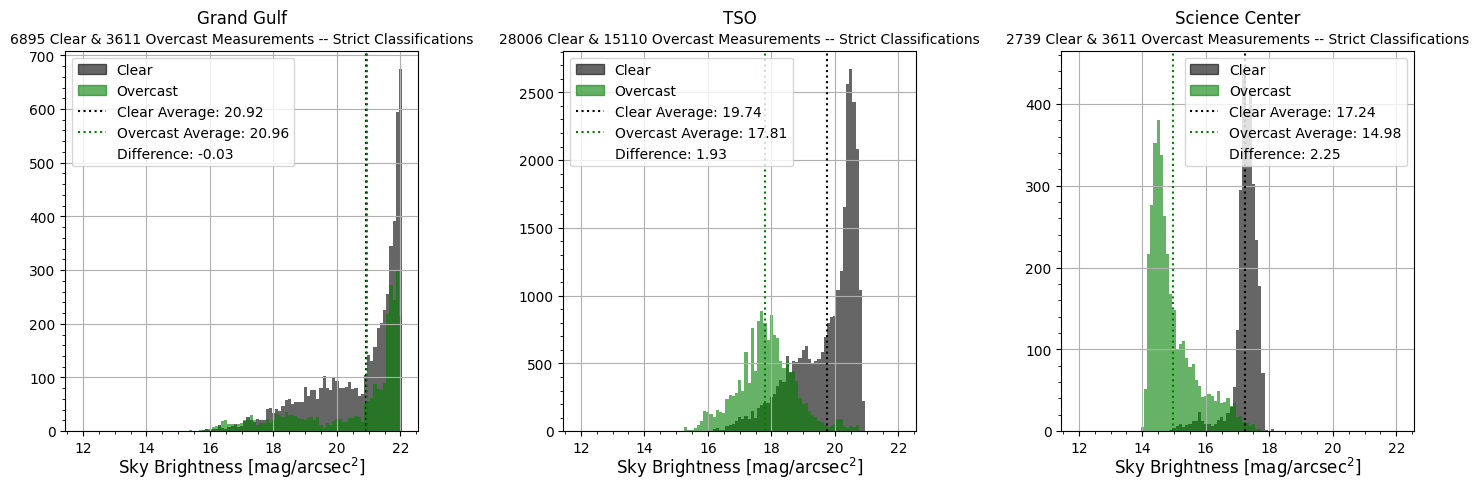

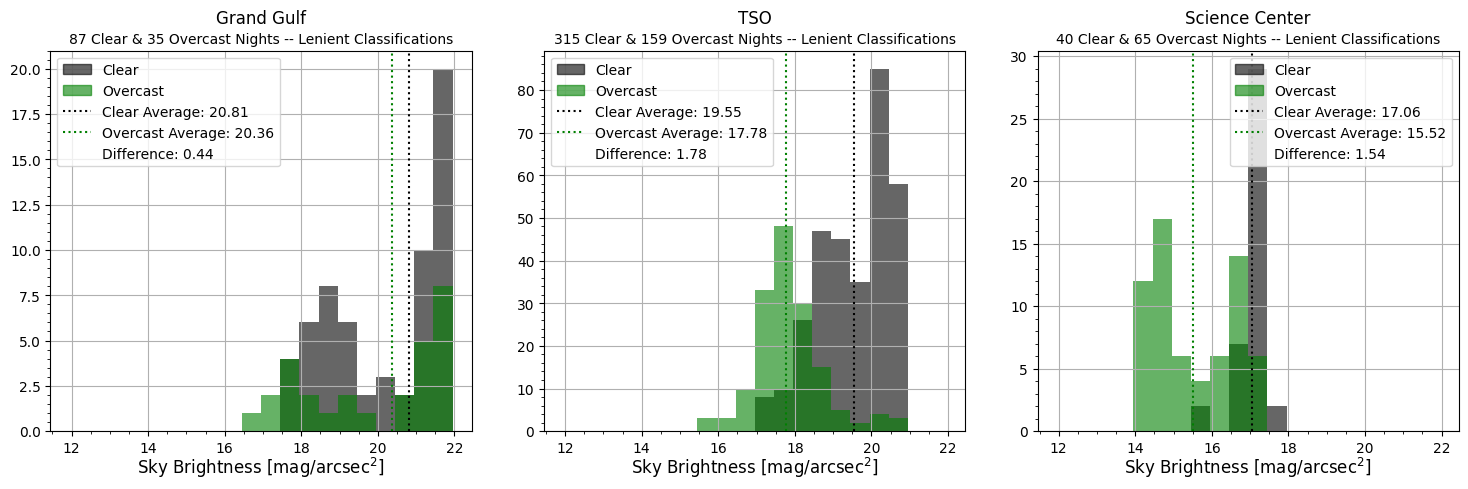

In [38]:
# 3-panel examples - separate for strict and lenient 

data_tab_directory = "Combined Data Tables"
files = os.listdir(data_tab_directory)
%matplotlib inline

# Define locations
my_locs = ["Grand Gulf", "TSO", "Science Center"]

# First set of histograms
fig1, axs1 = plt.subplots(1, 3, figsize=(15, 5))

for i, location in enumerate(my_locs):
    location = location.replace(' ', '_')
    csv_filenames = [file for file in files if file.endswith('.csv') and location in file]

    for df_filename in csv_filenames:
        df_path = os.path.join("Combined Data Tables", df_filename)
        df = pd.read_csv(df_path, low_memory=False)

        classifications = ["Clear", "Overcast"]
        rows_or_nights = ["Row"]
        classification_confidences = [True]

        for row_or_night in rows_or_nights:
            for classification_confidence in classification_confidences:
                make_stacked_hist(df, location, classification_confidence, row_or_night, ax=axs1[i], save_fig=False)

    axs1[i].set_title(location.replace("_"," "), y =1.05)

plt.tight_layout()
plt_save_path = os.path.join("histograms", "stacked histograms", f"triple-stacked-hist__row_strict")
plt.savefig(plt_save_path)
plt.show()

# Second set of histograms
fig2, axs2 = plt.subplots(1, 3, figsize=(15, 5))

for i, location in enumerate(my_locs):
    location = location.replace(' ', '_')
    csv_filenames = [file for file in files if file.endswith('.csv') and location in file]

    for df_filename in csv_filenames:
        df_path = os.path.join("Combined Data Tables", df_filename)
        df = pd.read_csv(df_path, low_memory=False)

        classifications = ["Clear", "Overcast"]
        rows_or_nights = ["Night"]
        classification_confidences = [False]

        for row_or_night in rows_or_nights:
            for classification_confidence in classification_confidences:
                make_stacked_hist(df, location, classification_confidence, row_or_night, ax=axs2[i], save_fig=False)

    axs2[i].set_title(location.replace("_"," "), y =1.05)

plt.tight_layout()
plt_save_path = os.path.join("histograms", "stacked histograms", f"triple-stacked-hist__night_strict")
plt.savefig(plt_save_path)
plt.show()

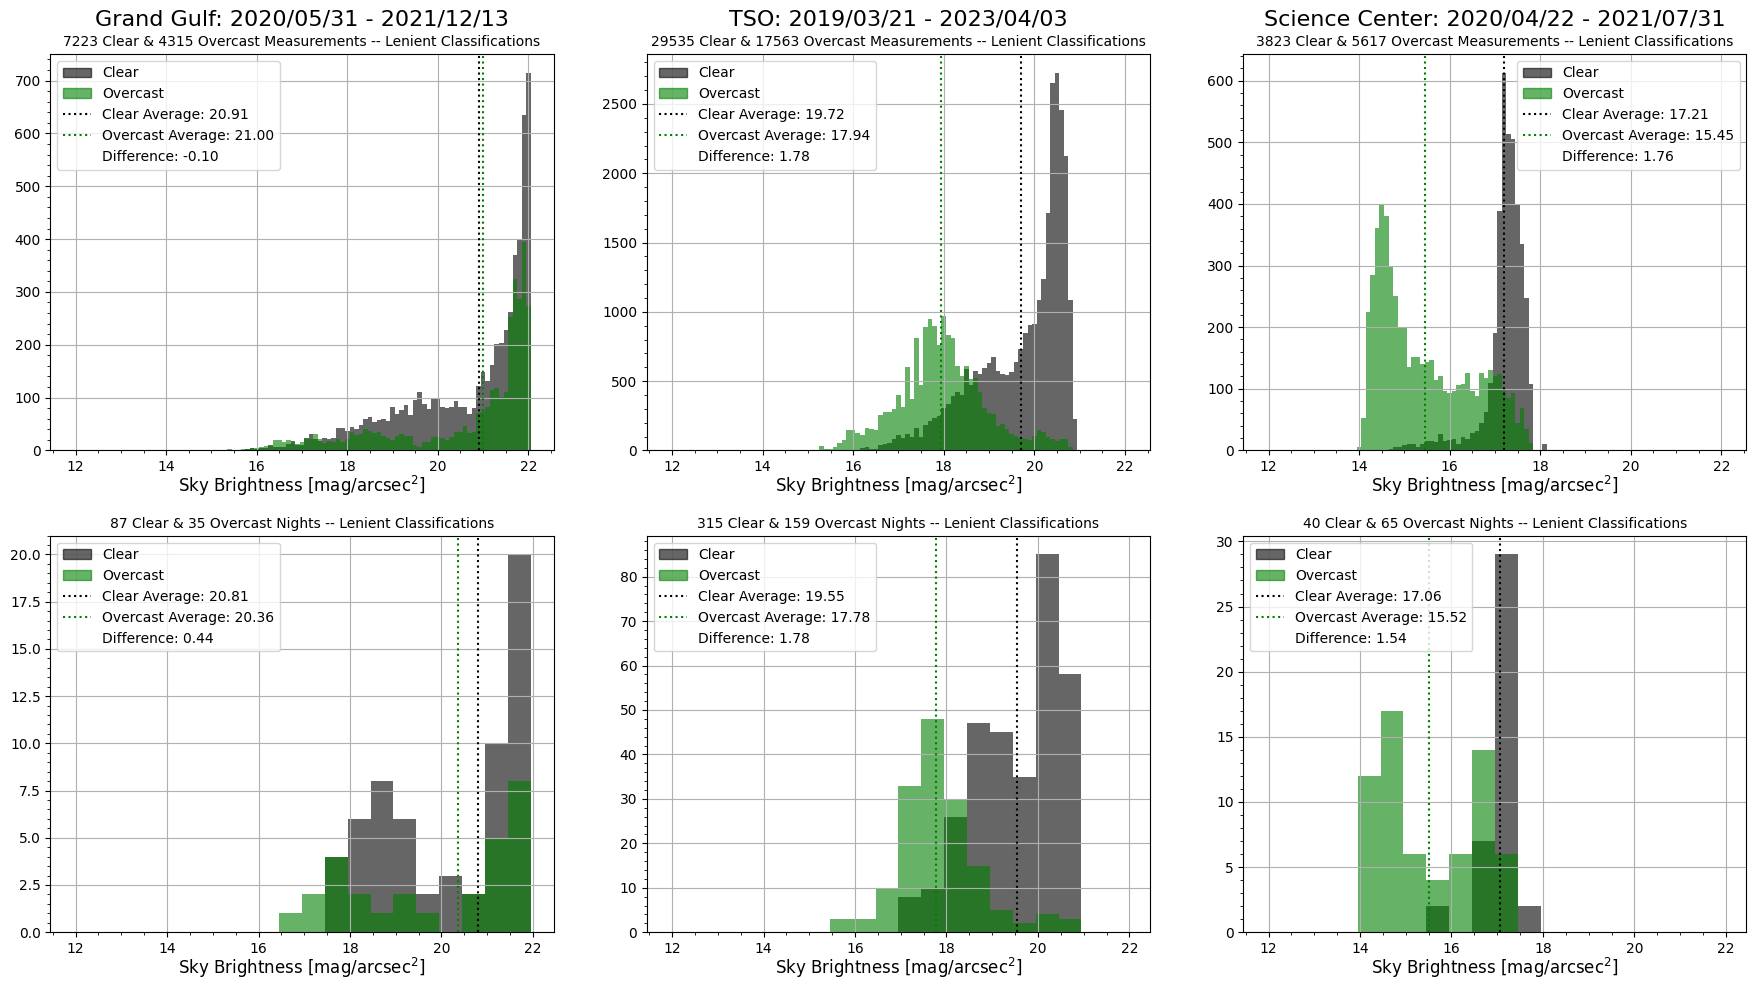

In [37]:
# 6-panel example of 3 sites 
data_tab_directory = "Combined Data Tables"
files = os.listdir(data_tab_directory)
%matplotlib inline

# Define locations
my_locs = ["Grand Gulf", "TSO", "Science Center"]

# Create a figure with 6 panels, arranged in 2 rows and 3 columns
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

for i, location in enumerate(my_locs):
    location = location.replace(' ', '_')
    csv_filenames = [file for file in files if file.endswith('.csv') and location in file]

    for df_filename in csv_filenames:
        df_path = os.path.join("Combined Data Tables", df_filename)
        df = pd.read_csv(df_path, low_memory=False)

        classifications = ["Clear", "Overcast"]
        classification_confidences = [ False]

        for j, row_or_night in enumerate(["Row", "Night"]):
            for k, classification_confidence in enumerate(classification_confidences):

                ax = axs[j, i]
                make_stacked_hist(df, location, classification_confidence, row_or_night, ax=ax, save_fig=False)
                if j == 1:
                    ax.set_title("            ")

# Hide the remaining axes
for ax in axs.ravel():
    if not ax.has_data():
        ax.set_visible(False)

plt.tight_layout()
plt_save_path = os.path.join("histograms", "stacked histograms", "triple_stacked_hist_examples")
plt.savefig(plt_save_path)
plt.show()


### 2) Make Night Plots

In [5]:
def plot_nights(df, location):
    
    # using vg_plotter_SQM.py

    # loop through nights in the df
    nights_list = df['Night Date'].unique()


    for night_date in nights_list[0:3]:

        # print(night_date)
        night_df = df[df["Night Date"] == night_date]
        sqms = night_df["SQM"].to_list()
        sqm_times = pd.to_datetime(night_df['Time'], format='%H:%M:%S').dt.strftime('%H:%M:%S').tolist()
        
        clouds = night_df["Cloud Cover"].to_list()
        
        # # print(clouds)
        
        # print(sqm_times)
        





        start_time = sqm_times[0]
        end_time = sqm_times[-1]

        moon_rise = pd.to_datetime(night_df.loc[night_df["Moon Rise"]==True, 'Time'], 
                             format='%M:%S:%f').dt.strftime('%H:%M:%S').tolist()
        

        

        
        peak_moon = night_df.loc[~night_df["Moon Peak"].isna(), "Moon Peak"].tolist()
        
        # Assuming "Time" column contains time values
        peak_moon_time = pd.to_datetime(night_df.loc[~night_df["Moon Peak"].isna(), "Time"], format='%M:%S:%f').dt.strftime('%H:%M:%S').tolist()
        
        # # checkpoint
        # print(f'peak moon time: {peak_moon_time} and alt {peak_moon}')
        
        moon_set = pd.to_datetime(night_df.loc[night_df["Moon Set"]==True, 'Time'], 
                             format='%M:%S:%f').dt.strftime('%H:%M:%S').tolist()
        
        
        sunrise = pd.to_datetime(night_df.loc[night_df["Astro Dawn"]==True, 'Time'], 
                             format='%M:%S:%f').dt.strftime('%H:%M:%S').tolist()
        

        sunset = pd.to_datetime(night_df.loc[night_df["Astro Dusk"]==True, 'Time'], 
                             format='%M:%S:%f').dt.strftime('%H:%M:%S').tolist()

        
        # print(f'checkpoint:sunrise sunset {sunrise}, {sunset}')

        # first, if there are no SQM measurements that night, don't bother plotting
        if np.all(np.isnan(sqms)):
            continue  # Skip to the next night if all entries are NaN

        

        # print(sqms)
        # print(sqm_times)
        fig,ax = plt.subplots(figsize=(16,10))
        ax.plot(sqm_times,sqms, color = "red", label = "SQM")
        plt.ylim(0,22)

        plt.xlim(start_time, end_time)
        # checkpoint
        print(f'{start_time}, {end_time}')
        
        



        
        cmap=plt.get_cmap('Greys',9)
        for i in range(len(clouds)):
            try:

                if int(clouds[i]) != 0:

                    window_start = sqm_times[i]

                    # print(sqm_times)
                    window_start_time_obj = datetime.strptime(window_start, "%H:%M:%S").time()
                    # Add a 5-minute time delta
                    window_end_time_obj = (datetime.combine(datetime.min, window_start_time_obj) + timedelta(minutes=5)).time()

                    

                    # Convert back to string
                    window_end= datetime.strftime(datetime.combine(datetime.min, window_end_time_obj), "%H:%M:%S")

                    # print(f' window: {window_start}, {window_end}')
                    
                    plt.axvspan(window_start, window_end,
                                facecolor=cmap(int(clouds[i])),alpha=.5)
                    
            except: # no weather data!
                plt.axvspan(window_start, window_end,
                                facecolor='orange',alpha=0.1)


        norm = mpl.colors.Normalize(vmin=0, vmax=8)
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

        # Add colorbar using the subplot's Axes (ax)
        plt.colorbar(sm, ax=ax, alpha=0.5, ticks=np.linspace(0, 8, 9), 
                     boundaries=np.arange(-0.5, 9.5, 1), label='Cloud Cover (oktas)')
       
        
        # # if there's a moon rise or set, plot them 

        # try:
        #     plt.axvline(moon_set,linewidth=2,linestyle='--',color='black',label='moonset')
        # except:
        #     pass
        # try:
        #     plt.axvline(moon_rise,linewidth=2,linestyle='dashdot',color='green',label='moonrise')
        # except:
        #     pass
        # try:
        #     #maximum = my_max
        #     plt.axvline(peak_moon_time,linewidth=2,linestyle='-',color='orange',
        #                 label=f'maximum moon\naltitude:{peak_moon} $[^\\circ]$')
        # except:
        #     pass

        
        # plt.hlines(.4,start_time,sunset,'orange',linewidth=20,alpha=.6)
        # plt.hlines(.4,sunset,sunrise,'darkblue',linewidth=20,alpha=.6)
        # plt.hlines(.4,sunrise,end_time,'orange',linewidth=20,alpha=.6)
        # plt.annotate("astronomical dusk",(sunset,0),(sunset,2),
        #             ha='center',arrowprops={'arrowstyle':'-'})
        # plt.annotate("astronomical dawn",(sunrise,0),(sunrise,2),
        #             ha='center',arrowprops={'arrowstyle':'-'})
        

        viirs = loc_dict.get(location.replace("_"," "))[0]
        plt.axhline(viirs,linewidth=2,linestyle='dotted',
                    color='purple',label='VIIRS estimate') ## make sure 'my_location' parameter matches the dictionary key
        plt.annotate(str(viirs)+r' $\frac{mag}{arcsec^2}$',(start_time,viirs),
                    (start_time,viirs-1),arrowprops={'arrowstyle':'-'})

        # plt.gcf().autofmt_xdate()
        # my_fmt = dates.DateFormatter("%H:%M")
        # plt.gca().xaxis.set_major_formatter(my_fmt)


        # # reformat ticks as HH:MM
        # hh_mm = DateFormatter('%H:%M')
        # ax.xaxis.set_major_formatter(hh_mm)
        # ax.yaxis.set_major_formatter(hh_mm)

        # plt.gcf().autofmt_xdate()

       

        my_title = location.replace("_"," ") + '\n' + night_date
        plt.title(my_title,fontsize=20)
        ax.legend(loc = 'upper right')
        plt.show()
    ###    plt.savefig("Plots\\" + my_location + '\\' + my_location + str(sqm_time[0])[:10]+ ".ps")
        save_path = os.path.join("Plots", location.replace("_", " ") + "_" + night_date + ".png")
        plt.savefig(save_path)
    ###    plt.show()
        fig.clf()
        plt.close(fig=fig)


In [6]:
def plot_nights(df, location):
    
    # using vg_plotter_SQM.py

    # loop through nights in the df
    nights_list = df['Night Date'].unique()


    for night_date in nights_list[0:3]:

        # print(night_date)
        night_df = df[df["Night Date"] == night_date]
        sqms = night_df["SQM"].to_list()
        sqm_times = pd.to_datetime(night_df['Time'], format='%H:%M:%S').dt.strftime('%H:%M:%S').tolist()
        
        clouds = night_df["Cloud Cover"].to_list()
        
        # # print(clouds)
        
        # print(sqm_times)
        





        start_time = sqm_times[0]
        end_time = sqm_times[-1]

        moon_rise = pd.to_datetime(night_df.loc[night_df["Moon Rise"]==True, 'Time'], 
                             format='%M:%S:%f').dt.strftime('%H:%M:%S').tolist()
        

        

        
        peak_moon = night_df.loc[~night_df["Moon Peak"].isna(), "Moon Peak"].tolist()
        
        # Assuming "Time" column contains time values
        peak_moon_time = pd.to_datetime(night_df.loc[~night_df["Moon Peak"].isna(), "Time"], format='%M:%S:%f').dt.strftime('%H:%M:%S').tolist()
        
        # # checkpoint
        # print(f'peak moon time: {peak_moon_time} and alt {peak_moon}')
        
        moon_set = pd.to_datetime(night_df.loc[night_df["Moon Set"]==True, 'Time'], 
                             format='%M:%S:%f').dt.strftime('%H:%M:%S').tolist()
        
        
        sunrise = pd.to_datetime(night_df.loc[night_df["Astro Dawn"]==True, 'Time'], 
                             format='%M:%S:%f').dt.strftime('%H:%M:%S').tolist()
        

        sunset = pd.to_datetime(night_df.loc[night_df["Astro Dusk"]==True, 'Time'], 
                             format='%M:%S:%f').dt.strftime('%H:%M:%S').tolist()

        
        # print(f'checkpoint:sunrise sunset {sunrise}, {sunset}')

        # first, if there are no SQM measurements that night, don't bother plotting
        if np.all(np.isnan(sqms)):
            continue  # Skip to the next night if all entries are NaN

        

        # print(sqms)
        # print(sqm_times)
        fig,ax = plt.subplots(figsize=(16,10))
        ax.plot(sqm_times,sqms, color = "red", label = "SQM")
        plt.ylim(0,22)

        plt.xlim(start_time, end_time)
        # checkpoint
        print(f'{start_time}, {end_time}')
        
        



        
        cmap=plt.get_cmap('Greys',9)
        for i in range(len(clouds)):
            try:

                if int(clouds[i]) != 0:

                    window_start = sqm_times[i]

                    # print(sqm_times)
                    window_start_time_obj = datetime.strptime(window_start, "%H:%M:%S").time()
                    # Add a 5-minute time delta
                    window_end_time_obj = (datetime.combine(datetime.min, window_start_time_obj) + timedelta(minutes=5)).time()

                    

                    # Convert back to string
                    window_end= datetime.strftime(datetime.combine(datetime.min, window_end_time_obj), "%H:%M:%S")

                    # print(f' window: {window_start}, {window_end}')
                    
                    plt.axvspan(window_start, window_end,
                                facecolor=cmap(int(clouds[i])),alpha=.5)
                    
            except: # no weather data!
                plt.axvspan(window_start, window_end,
                                facecolor='purple',alpha=0.05)


        norm = mpl.colors.Normalize(vmin=0, vmax=8)
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

        # Add colorbar using the subplot's Axes (ax)
        plt.colorbar(sm, ax=ax, alpha=0.5, ticks=np.linspace(0, 8, 9), 
                     boundaries=np.arange(-0.5, 9.5, 1), label='Cloud Cover (oktas)')
       
        
        # # if there's a moon rise or set, plot them 

        # try:
        #     plt.axvline(moon_set,linewidth=2,linestyle='--',color='black',label='moonset')
        # except:
        #     pass
        # try:
        #     plt.axvline(moon_rise,linewidth=2,linestyle='dashdot',color='green',label='moonrise')
        # except:
        #     pass
        # try:
        #     #maximum = my_max
        #     plt.axvline(peak_moon_time,linewidth=2,linestyle='-',color='orange',
        #                 label=f'maximum moon\naltitude:{peak_moon} $[^\\circ]$')
        # except:
        #     pass

        
        # plt.hlines(.4,start_time,sunset,'orange',linewidth=20,alpha=.6)
        # plt.hlines(.4,sunset,sunrise,'darkblue',linewidth=20,alpha=.6)
        # plt.hlines(.4,sunrise,end_time,'orange',linewidth=20,alpha=.6)
        # plt.annotate("astronomical dusk",(sunset,0),(sunset,2),
        #             ha='center',arrowprops={'arrowstyle':'-'})
        # plt.annotate("astronomical dawn",(sunrise,0),(sunrise,2),
        #             ha='center',arrowprops={'arrowstyle':'-'})
        

        viirs = loc_dict.get(location.replace("_"," "))[0]
        plt.axhline(viirs,linewidth=2,linestyle='dotted',
                    color='purple',label='VIIRS estimate') ## make sure 'my_location' parameter matches the dictionary key
        plt.annotate(str(viirs)+r' $\frac{mag}{arcsec^2}$',(start_time,viirs),
                    (start_time,viirs-1),arrowprops={'arrowstyle':'-'})

        # plt.gcf().autofmt_xdate()
        # my_fmt = dates.DateFormatter("%H:%M")
        # plt.gca().xaxis.set_major_formatter(my_fmt)


        # # reformat ticks as HH:MM
        # hh_mm = DateFormatter('%H:%M')
        # ax.xaxis.set_major_formatter(hh_mm)
        # ax.yaxis.set_major_formatter(hh_mm)

        # plt.gcf().autofmt_xdate()

       

        my_title = location.replace("_"," ") + '\n' + night_date
        plt.title(my_title,fontsize=20)
        ax.legend(loc = 'upper right')
        plt.show()
    ###    plt.savefig("Plots\\" + my_location + '\\' + my_location + str(sqm_time[0])[:10]+ ".ps")
        save_path = os.path.join("Plots", location.replace("_", " ") + "_" + night_date + ".png")
        plt.savefig(save_path)
    ###    plt.show()
        fig.clf()
        plt.close(fig=fig)


In [7]:
def plot_nights(df, location):
    
    # using vg_plotter_SQM.py

    # loop through nights in the df
    nights_list = df['Night Date'].unique()


    for night_date in nights_list[0:3]:

        # print(night_date)
        night_df = df[df["Night Date"] == night_date]
        sqms = night_df["SQM"].to_list()

        sqm_times = pd.to_datetime(night_df['Time'], format='%H:%M:%S').dt.strftime('%H:%M:%S').tolist()
        
        clouds = night_df["Cloud Cover"].to_list()
        
        # # print(clouds)
        
        # print(sqm_times)
        

        start_time = sqm_times[0]
        end_time = sqm_times[-1]

        moon_rise = pd.to_datetime(night_df.loc[night_df["Moon Rise"]==True, 'Time'], 
                             format='%M:%S:%f').dt.strftime('%H:%M:%S').tolist()
        

        

        
        peak_moon = night_df.loc[~night_df["Moon Peak"].isna(), "Moon Peak"].tolist()
        
        # Assuming "Time" column contains time values
        peak_moon_time = pd.to_datetime(night_df.loc[~night_df["Moon Peak"].isna(), "Time"], format='%M:%S:%f').dt.strftime('%H:%M:%S').tolist()
        
        # # checkpoint
        # print(f'peak moon time: {peak_moon_time} and alt {peak_moon}')
        
        moon_set = pd.to_datetime(night_df.loc[night_df["Moon Set"]==True, 'Time'], 
                             format='%M:%S:%f').dt.strftime('%H:%M:%S').tolist()
        
        
        sunrise = pd.to_datetime(night_df.loc[night_df["Astro Dawn"]==True, 'Time'], 
                             format='%M:%S:%f').dt.strftime('%H:%M:%S').tolist()
        

        sunset = pd.to_datetime(night_df.loc[night_df["Astro Dusk"]==True, 'Time'], 
                             format='%M:%S:%f').dt.strftime('%H:%M:%S').tolist()

        
        print(f'checkpoint:sunrise sunset {sunrise}, {sunset}')

        # first, if there are no SQM measurements that night, don't bother plotting
        if np.all(np.isnan(sqms)):
            continue  # Skip to the next night if all entries are NaN

        

        # print(sqms)
        # print(sqm_times)
        fig,ax = plt.subplots(figsize=(16,10))
        ax.plot(sqm_times,sqms, color = "red", label = "SQM")
        plt.ylim(0,22)

        plt.xlim(start_time, end_time)
        
        # Add tick marks every three hours from noon to noon
        tick_labels = ['12:00', '15:00', '18:00', '21:00', '00:00', '03:00', '06:00', '09:00', '12:00']
      
        tick_positions = np.linspace(0, 287, 9)
       

        ax.set_xticks(tick_positions)
        ax.set_xticklabels(tick_labels)





        # checkpoint
        print(f'{start_time}, {end_time}')
        
        



        
        cmap=plt.get_cmap('Greys',9)
        for i in range(len(clouds)):

            window_start = sqm_times[i]

            try: 
                window_end = sqm_times[i+1]
            except:
                window_start= 286
                window_end = 287

            # # print(sqm_times)
            # window_start_time_obj = datetime.strptime(window_start, "%H:%M:%S").time()
            # # Add a 5-minute time delta
            # window_end_time_obj = (datetime.combine(datetime.min, window_start_time_obj) + timedelta(minutes=5)).time()

            

            # # Convert back to string
            # window_end= datetime.strftime(datetime.combine(datetime.min, window_end_time_obj), "%H:%M:%S")
            
            try:

                if int(clouds[i]) != 0:

                    

                    # print(f' window: {window_start}, {window_end}')
                    
                    plt.axvspan(window_start, window_end,
                                facecolor=cmap(int(clouds[i])),alpha=.5)
                    
            except Exception as e: # no weather data!
                print(e)
                plt.axvspan(window_start, window_end,
                                facecolor='green',alpha=0.4)


        norm = mpl.colors.Normalize(vmin=0, vmax=8)
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

        # Add colorbar using the subplot's Axes (ax)
        plt.colorbar(sm, ax=ax, alpha=0.5, ticks=np.linspace(0, 8, 9), 
                     boundaries=np.arange(-0.5, 9.5, 1), label='Cloud Cover (oktas)')
       
        
        # if there's a moon rise or set, plot them 

        try:
            plt.axvline(moon_set,linewidth=2,linestyle='--',color='black',label='moonset')
        except:
            pass
        try:
            plt.axvline(moon_rise,linewidth=2,linestyle='dashdot',color='green',label='moonrise')
        except:
            pass
        try:
            #maximum = my_max
            plt.axvline(peak_moon_time,linewidth=2,linestyle='-',color='orange',
                        label=f'maximum moon\naltitude:{peak_moon} $[^\\circ]$')
        except:
            pass

        
        plt.hlines(.4,start_time,sunset,'orange',linewidth=20,alpha=.6)
        plt.hlines(.4,sunset,sunrise,'darkblue',linewidth=20,alpha=.6)
        plt.hlines(.4,sunrise,end_time,'orange',linewidth=20,alpha=.6)
        plt.annotate("astronomical dusk",(sunset,0),(sunset,2),
                    ha='center',arrowprops={'arrowstyle':'-'})
        plt.annotate("astronomical dawn",(sunrise,0),(sunrise,2),
                    ha='center',arrowprops={'arrowstyle':'-'})
        

        viirs = loc_dict.get(location.replace("_"," "))[0]
        plt.axhline(viirs,linewidth=2,linestyle='dotted',
                    color='purple',label='VIIRS estimate') ## make sure 'my_location' parameter matches the dictionary key
        plt.annotate(str(viirs)+r' $\frac{mag}{arcsec^2}$',(start_time,viirs),
                    (start_time,viirs-1),arrowprops={'arrowstyle':'-'})

      

        my_title = location.replace("_"," ") + '\n' + night_date
        plt.title(my_title,fontsize=20)
        ax.legend(loc = 'upper right')
        plt.show()
    ###    plt.savefig("Plots\\" + my_location + '\\' + my_location + str(sqm_time[0])[:10]+ ".ps")
        save_path = os.path.join("Plots", location.replace("_", " ") + "_" + night_date + ".png")
        plt.savefig(save_path)
    ###    plt.show()
        fig.clf()
        plt.close(fig=fig)


checkpoint:sunrise sunset ['00:04:00'], []
checkpoint:sunrise sunset ['00:04:00'], ['00:22:15']
12:00:00, 11:55:00


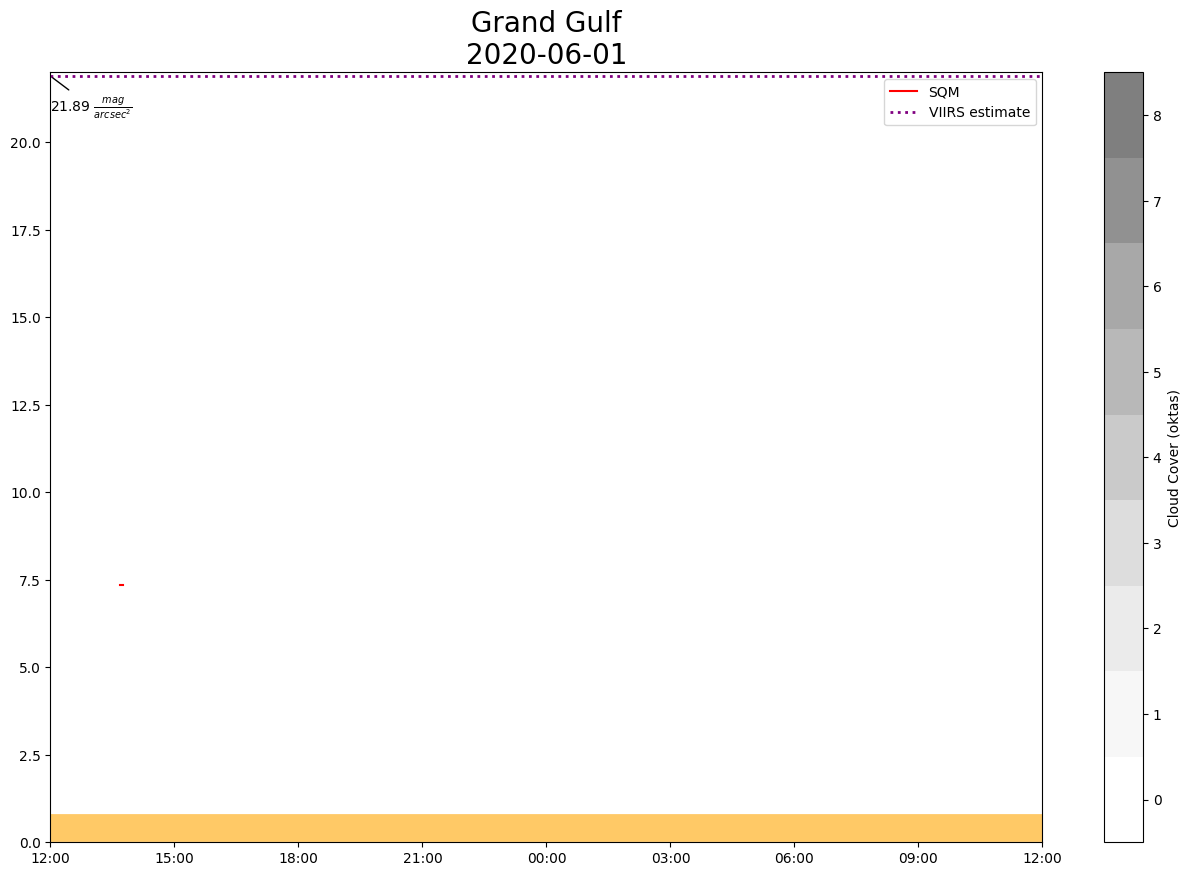

checkpoint:sunrise sunset ['00:04:00'], ['00:22:15']
checkpoint:sunrise sunset ['00:05:40'], []
checkpoint:sunrise sunset ['00:05:40'], ['00:21:00']
12:00:00, 11:55:00


<Figure size 640x480 with 0 Axes>

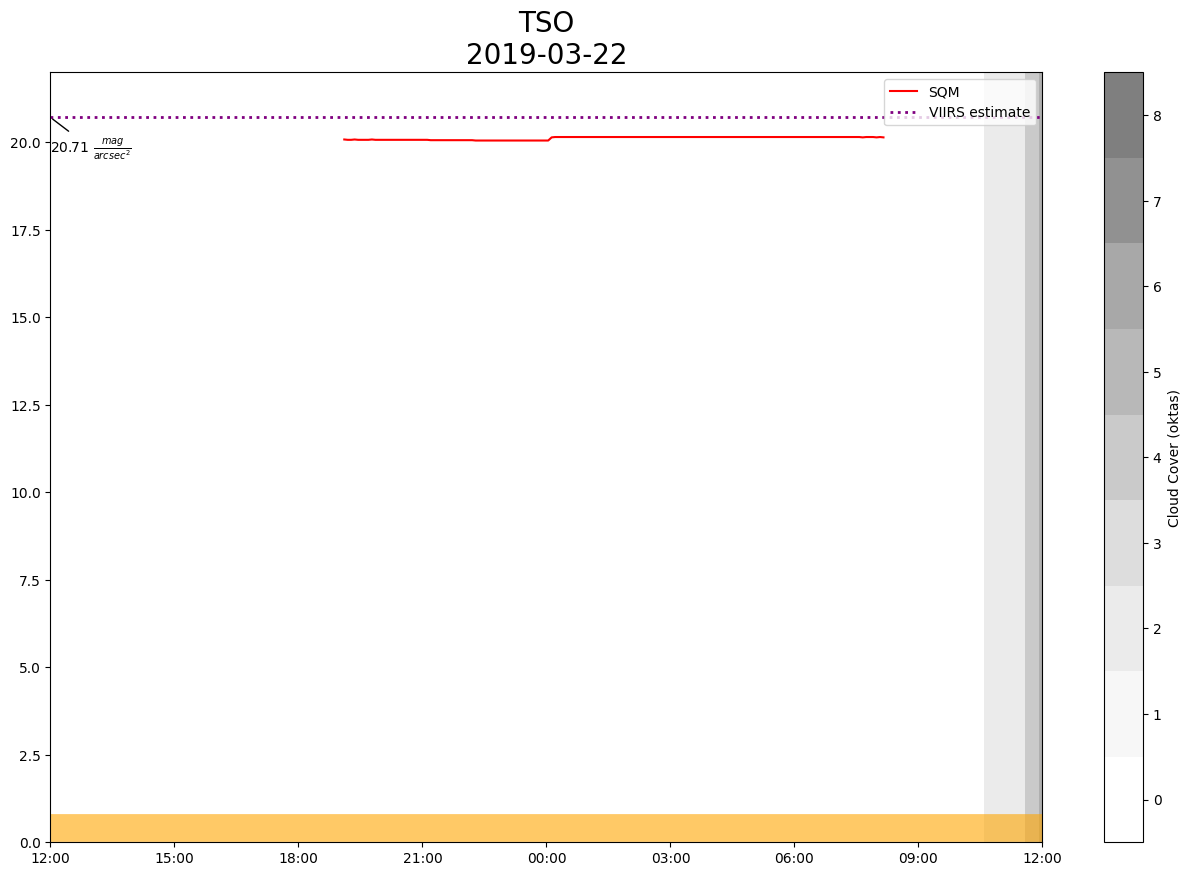

checkpoint:sunrise sunset ['00:05:35'], ['00:21:00']
12:00:00, 11:55:00


<Figure size 640x480 with 0 Axes>

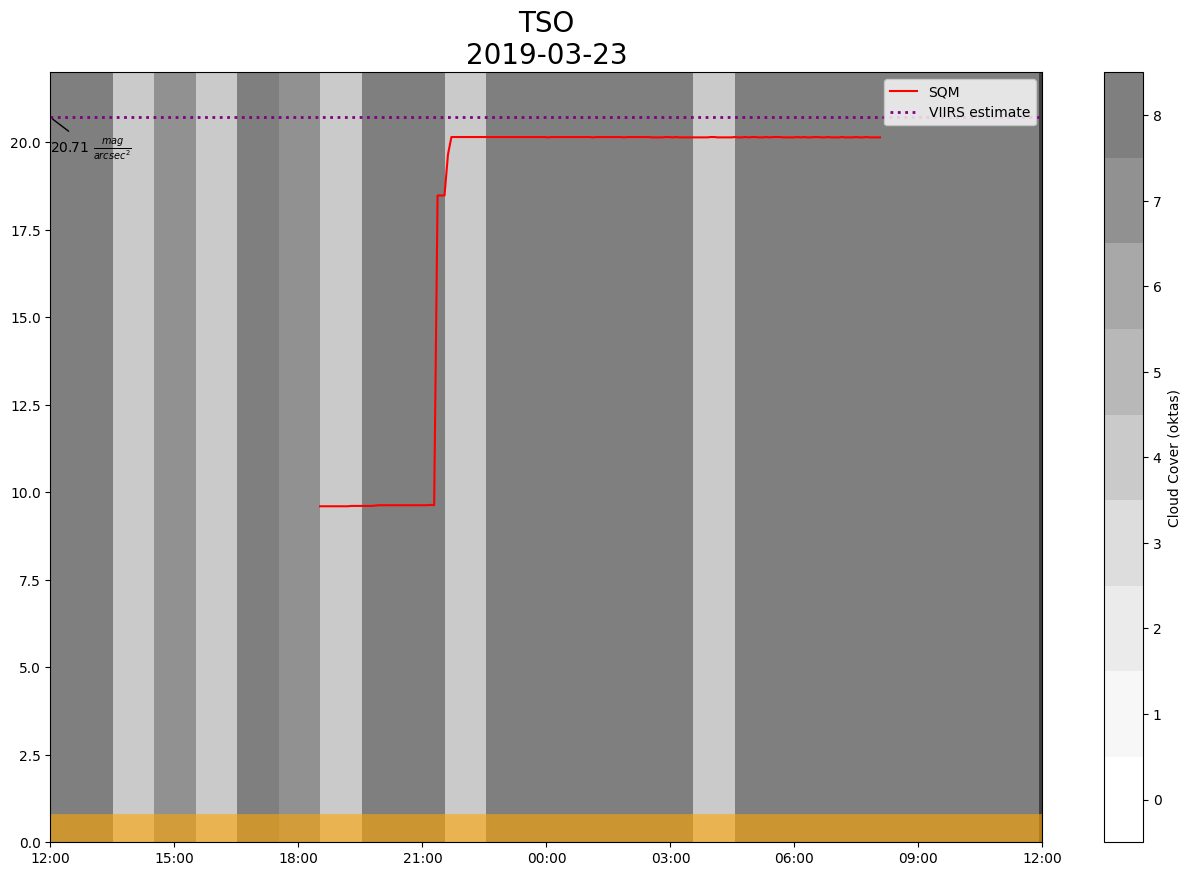

checkpoint:sunrise sunset ['00:04:35'], []
checkpoint:sunrise sunset ['00:04:35'], ['00:21:30']
12:00:00, 11:55:00


<Figure size 640x480 with 0 Axes>

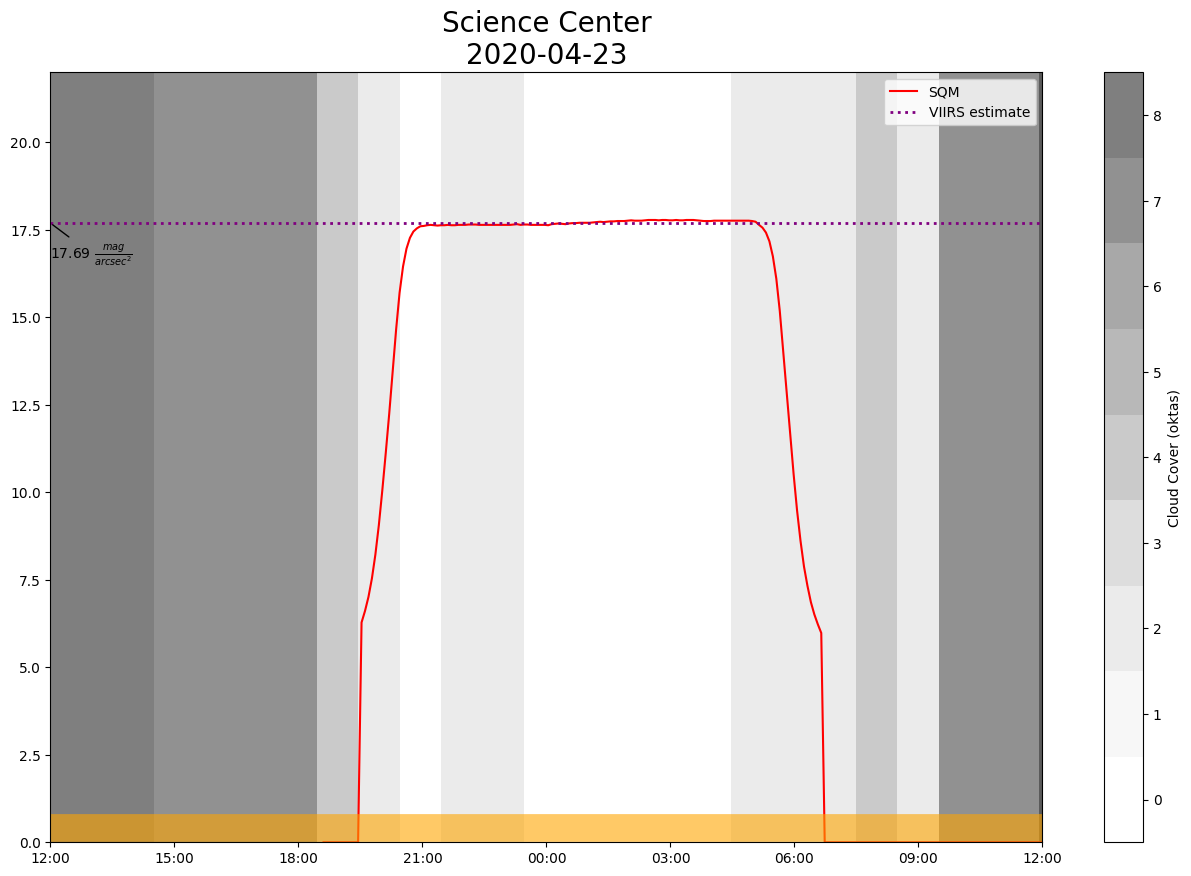

checkpoint:sunrise sunset ['00:04:35'], ['00:21:30']
12:00:00, 11:55:00


<Figure size 640x480 with 0 Axes>

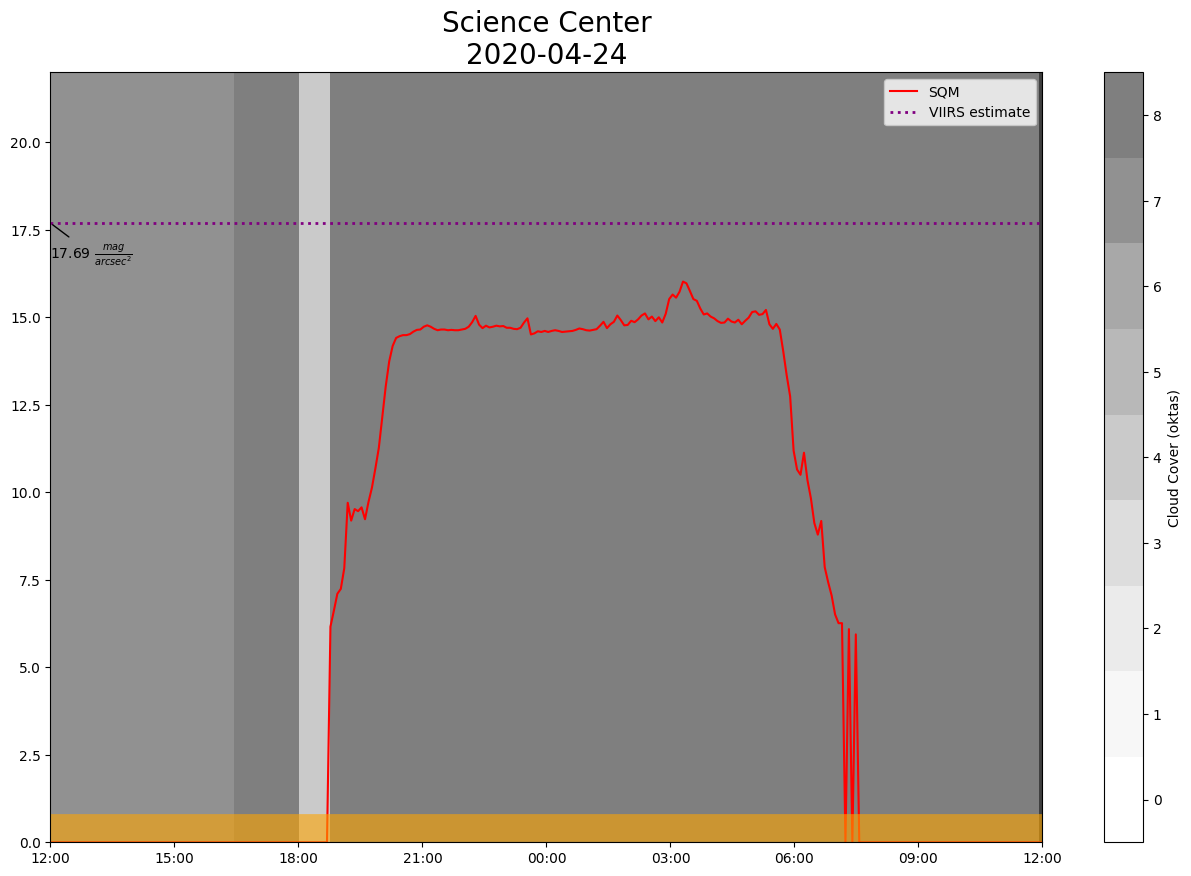

<Figure size 640x480 with 0 Axes>

In [8]:
data_tab_directory = "Combined Data Tables"
files = os.listdir(data_tab_directory)
%matplotlib inline

for location in my_locs:  
  
    # Filter only CSV files containing the desired location in their filename
    location = location.replace(' ', '_')
    csv_filenames = [file for file in files if file.endswith('.csv') and location in file]

    for df_filename in csv_filenames:
        df_path = os.path.join("Combined Data Tables", df_filename)
        df = pd.read_csv(df_path, low_memory=False)

        plot_nights(df, location = location)
        

### Moon Plot

In [51]:

def plot_avgs(df, location):
    
    # Convert 'Night Date' column to datetime format
    df['Night Date'] = pd.to_datetime(df['Night Date'])
    
    # Loop through nights in the df
    nights_list = df['Night Date'].unique()
    
    # Filter for nightly data at midnight
    nightly_df = df[df['Time'] == "00:00:00"]
    
    # # Extract SQM values and dates
    sqms = nightly_df['SQM'][0:365]
    date = nightly_df["Night Date"][0:365]

    # sqms = nightly_df['SQM']
    # date = nightly_df["Night Date"]
    
    
    # Plotting
    fig, ax = plt.subplots(figsize=(16, 10))
    ax.plot(date, sqms, color="black", label="SQM")  # SQM label fixed

    # Set y-axis limit
    # ax.set_ylim(13.5, 23.5)

    # Set x-axis limit
    # ax.set_xlim(pd.Timestamp('2021-01-01'), pd.Timestamp('2021-12-31'))
    
    # Improved axes labels with larger font size and bumper space
    ax.set_xlabel("Date", fontsize=14, labelpad=17)
    ax.set_ylabel("SQM $(\\frac{mag}{arcsec^2})$", fontsize=14, labelpad=17)
    
    # Setting tick marks to label each month
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter("%b %Y"))

    ax.tick_params(axis='x', which='major', labelsize=14)
    
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    
    location = loc_dict[location][2]

    # Setting the title with larger font size and bumper space
    ax.set_title(location.replace("_"," "), fontsize=24, pad=20)
    # ax.set_title("Rolla (Physics Building)", fontsize=26, pad=20)

    save_path = os.path.join("Plots", location.replace("_", " ") + "_moon" + ".png")
    plt.savefig(save_path)

In [52]:
loc_dict.keys()

dict_keys(['Rolla', 'MAC', 'SEMO', 'Timberlane', 'Ozark', 'Ozark_II', 'Perryville', 'Overland', 'Hillsboro', 'Science Center', 'Magruder Hall', 'MG Hall', 'TSO', 'Thousand_Hills', 'Grand Gulf', 'echo bluff', 'Jefferson Arch', 'Broemmelsiek Park'])

In [53]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.dates as dates
# from matplotlib.dates import HourLocator

# def plot_avgs(df, location):
    
#     # Convert 'Night Date' column to datetime format
#     df['Night Date'] = pd.to_datetime(df['Night Date'])
    
#     # Loop through nights in the df
#     nights_list = df['Night Date'].unique()
    
#     # Filter for nightly data at midnight
#     nightly_df = df[df['Time'] == "00:00:00"]
    
#     # Extract SQM values and dates
#     sqms = nightly_df['SQM']
#     date = nightly_df["Night Date"]

#     # Plotting
#     fig, ax = plt.subplots(figsize=(16, 10))
#     ax.plot(date, sqms, color="black", label="SQM")  # SQM label fixed

#     # Set y-axis limit
#     ax.set_ylim(13.5, 23.5)

#     # Improved axes labels with larger font size and bumper space
#     ax.set_xlabel("Date", fontsize=14, labelpad=17)
#     ax.set_ylabel("SQM $(\\frac{mag}{arcsec^2})$", fontsize=14, labelpad=17)
    
#     # Setting tick marks to label every 3 hours
#     locator = dates.HourLocator(interval=3)
#     ax.xaxis.set_major_locator(locator)

#     ax.tick_params(axis='x', which='major', labelsize=14)
    
#     plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    
#     #location = loc_dict[location.replace("_"," ")][2]

#     # Setting the title with larger font size and bumper space
#     ax.set_title(location, fontsize=24, pad=20)
#     # ax.set_title("Rolla (Physics Building)", fontsize=26, pad=20)


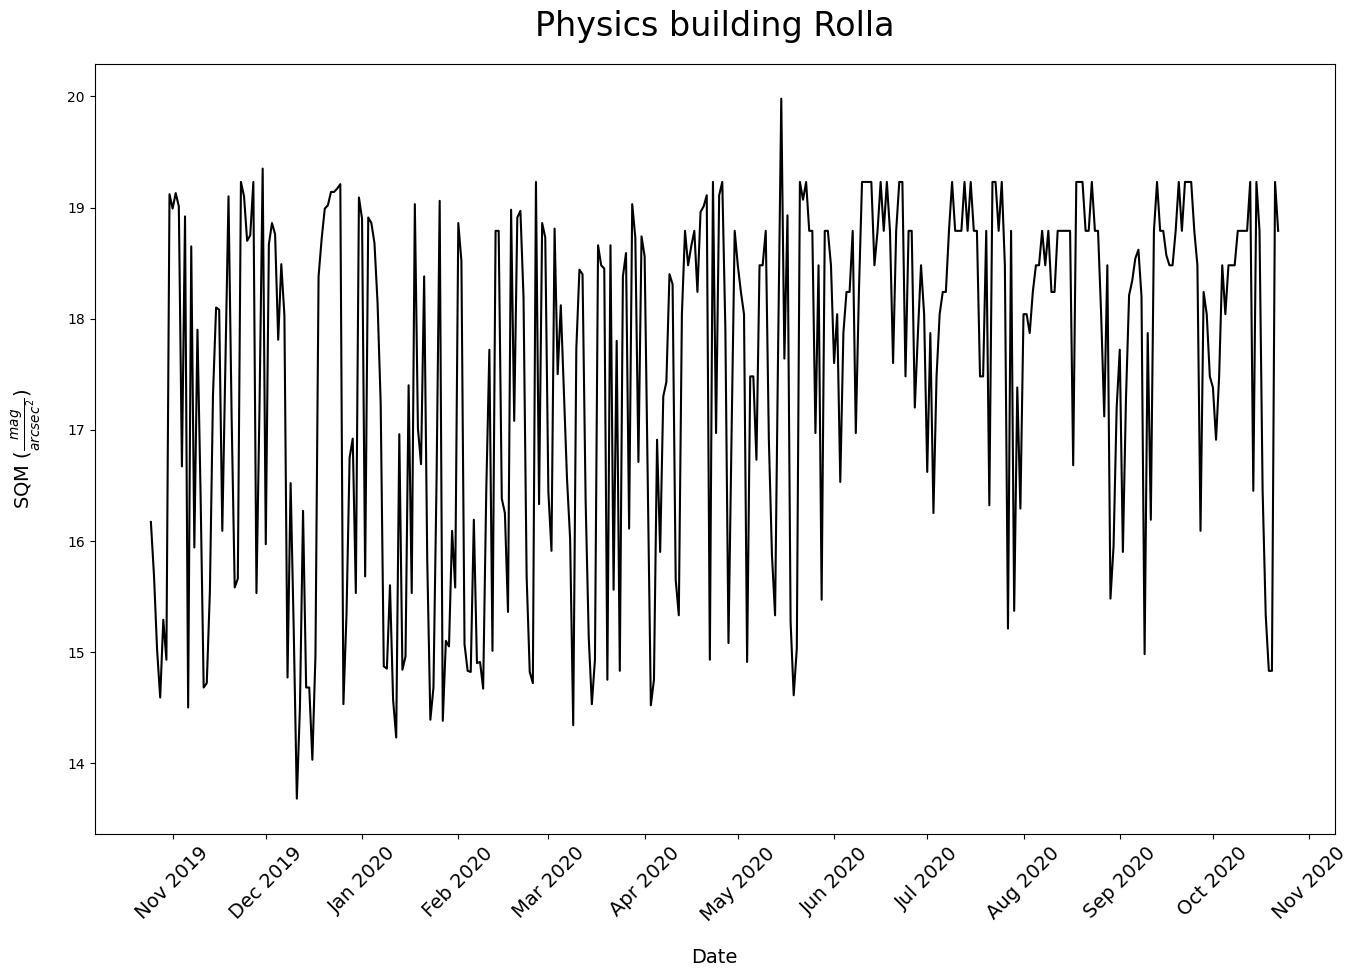

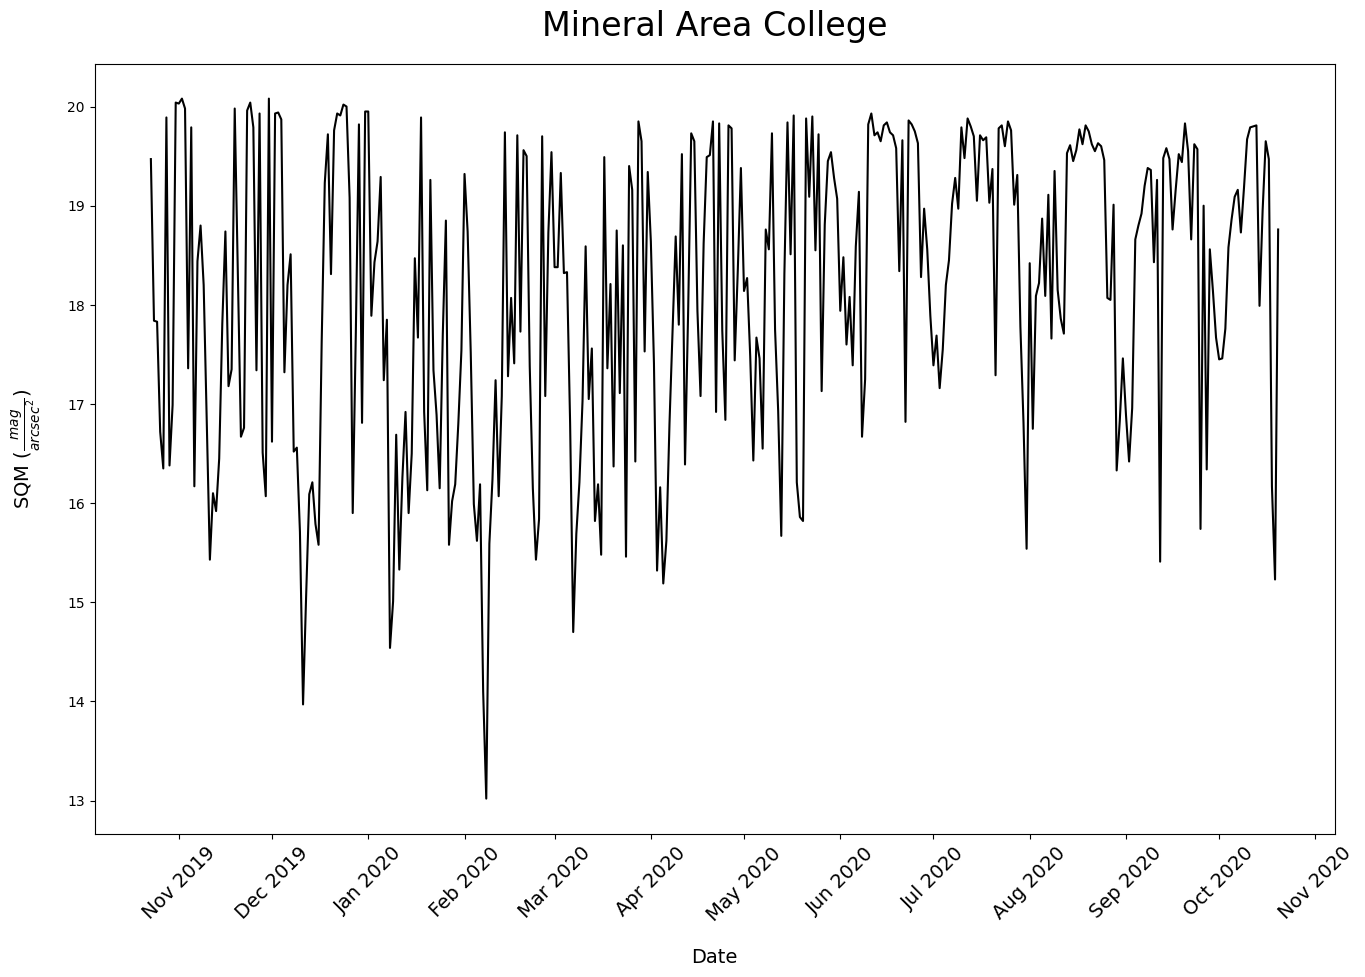

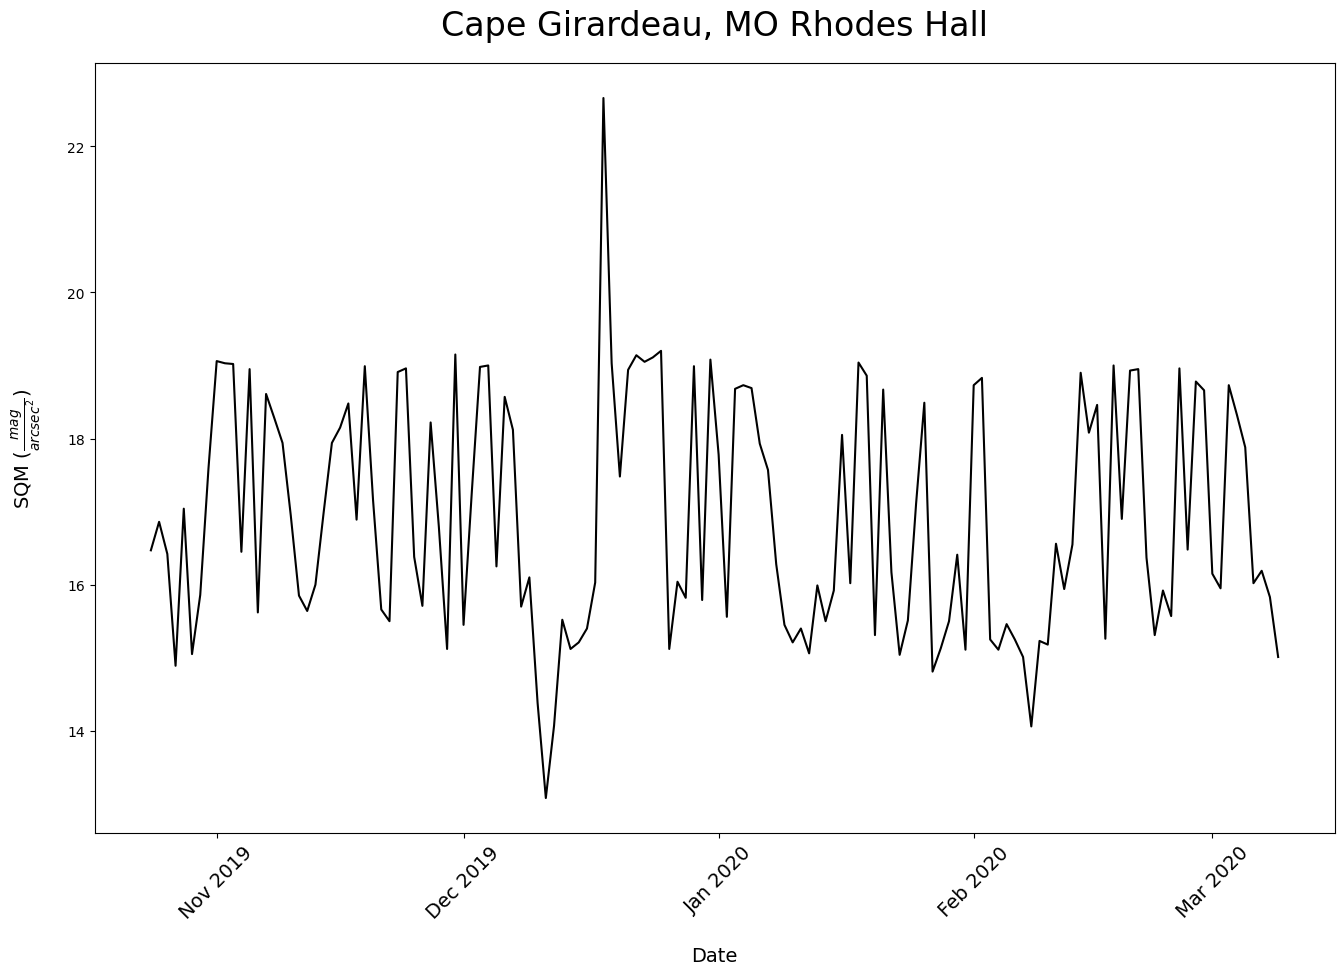

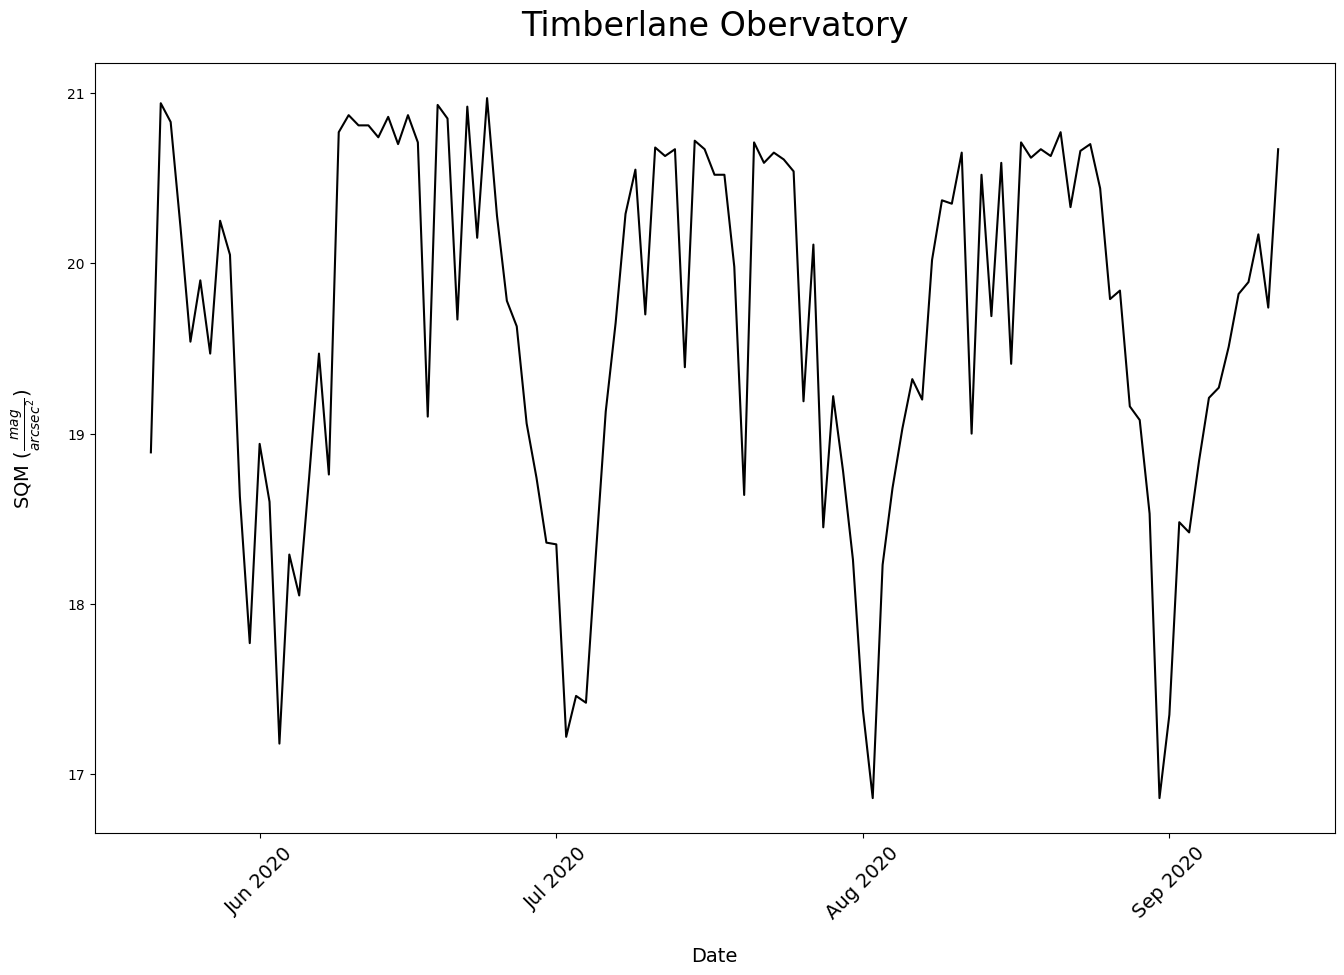

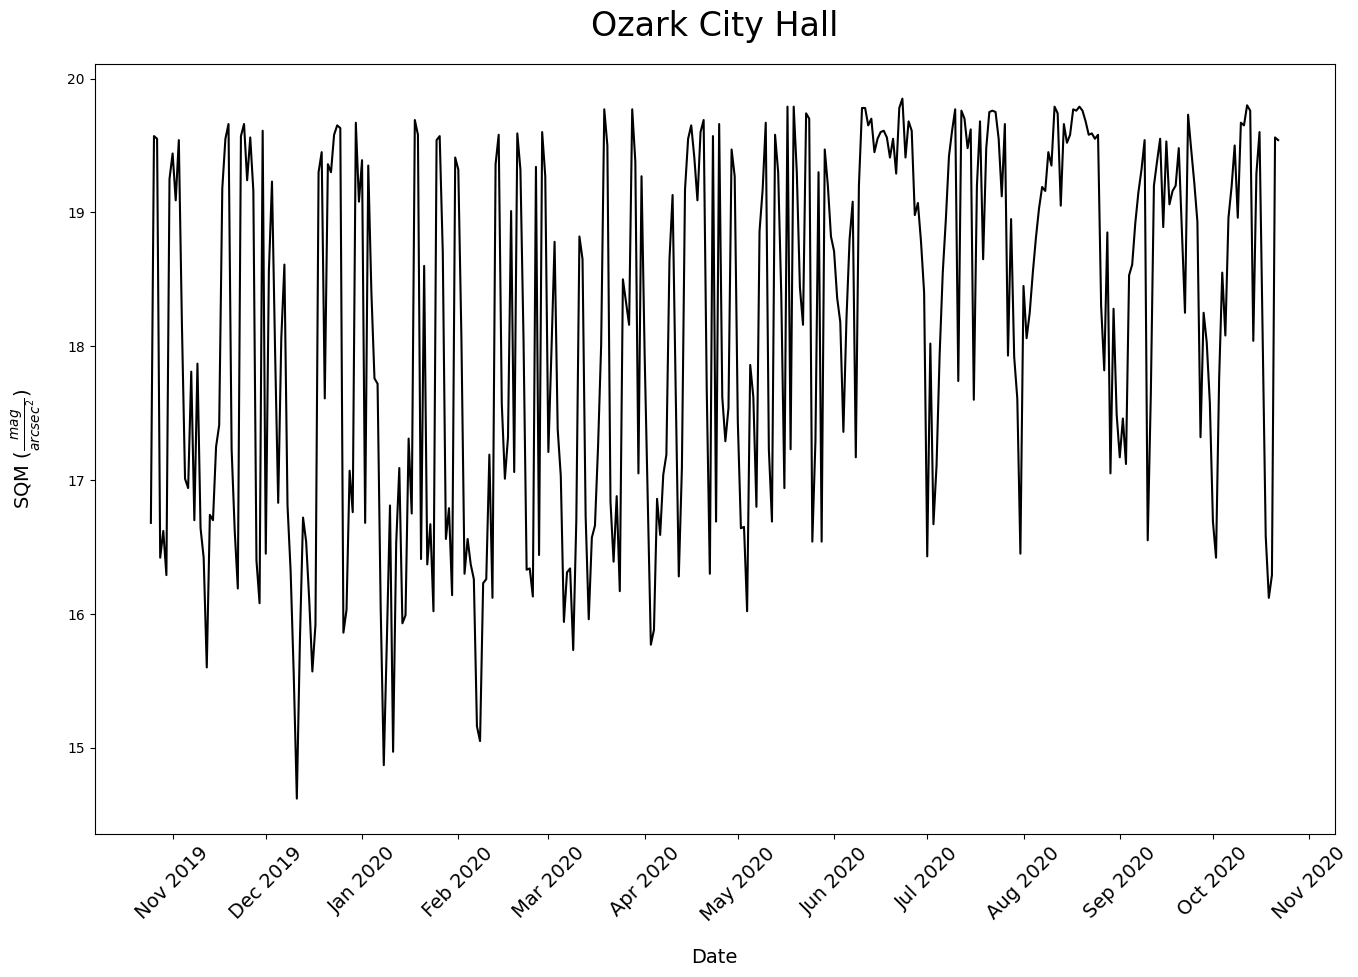

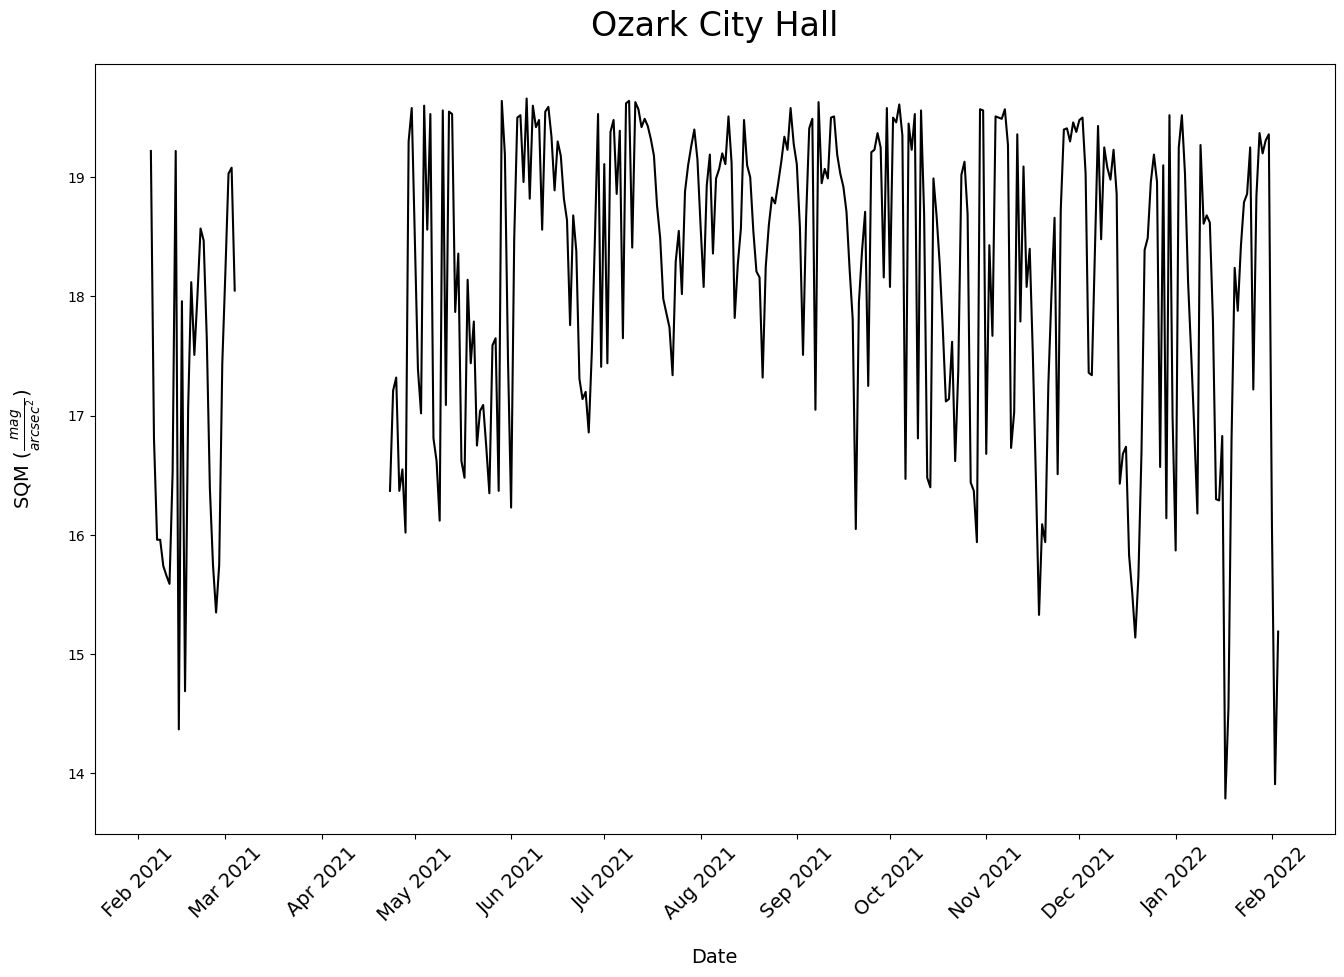

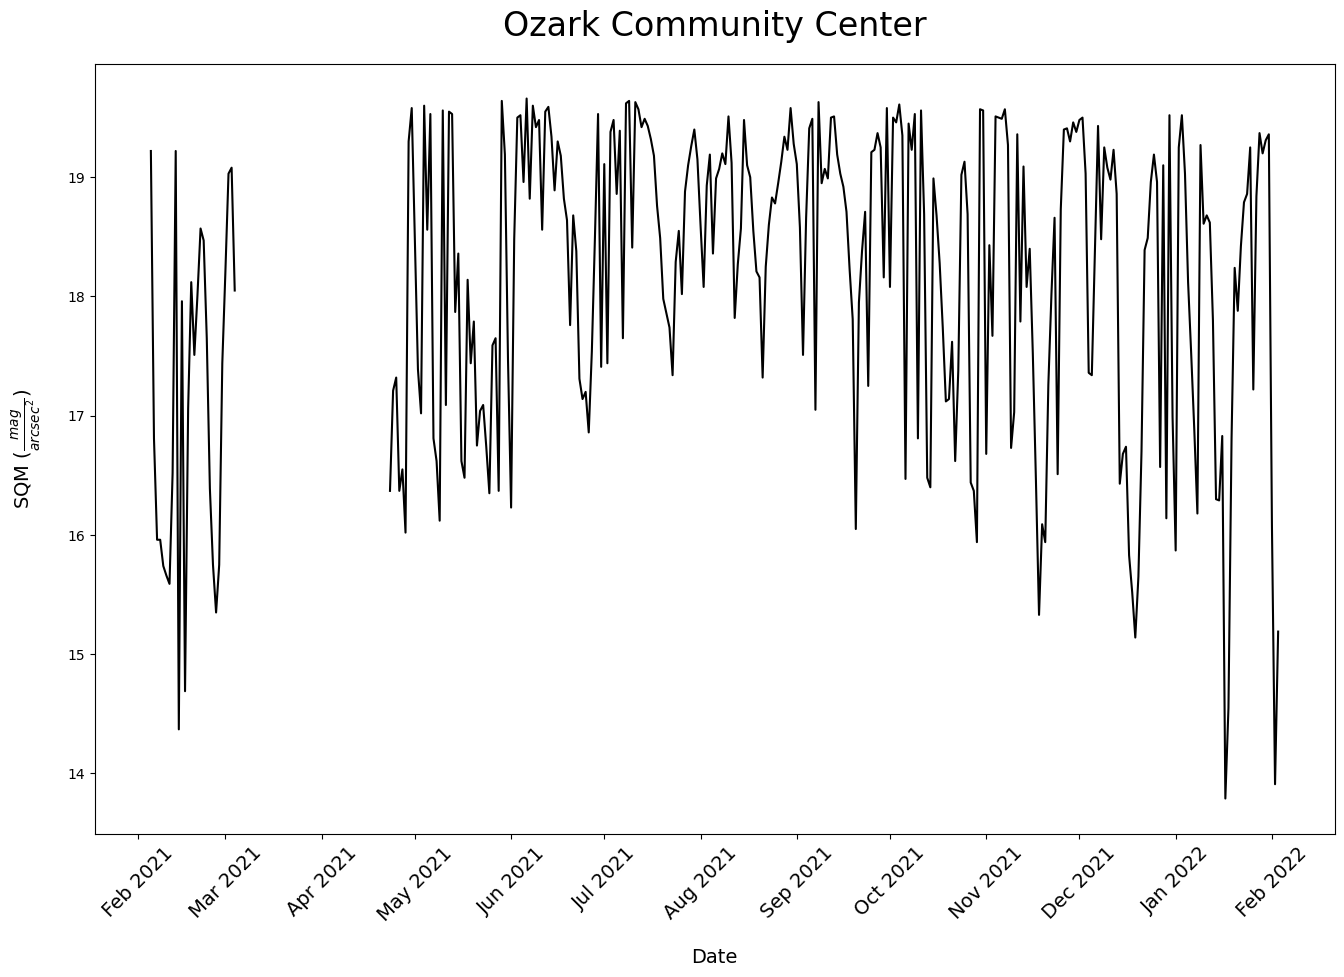

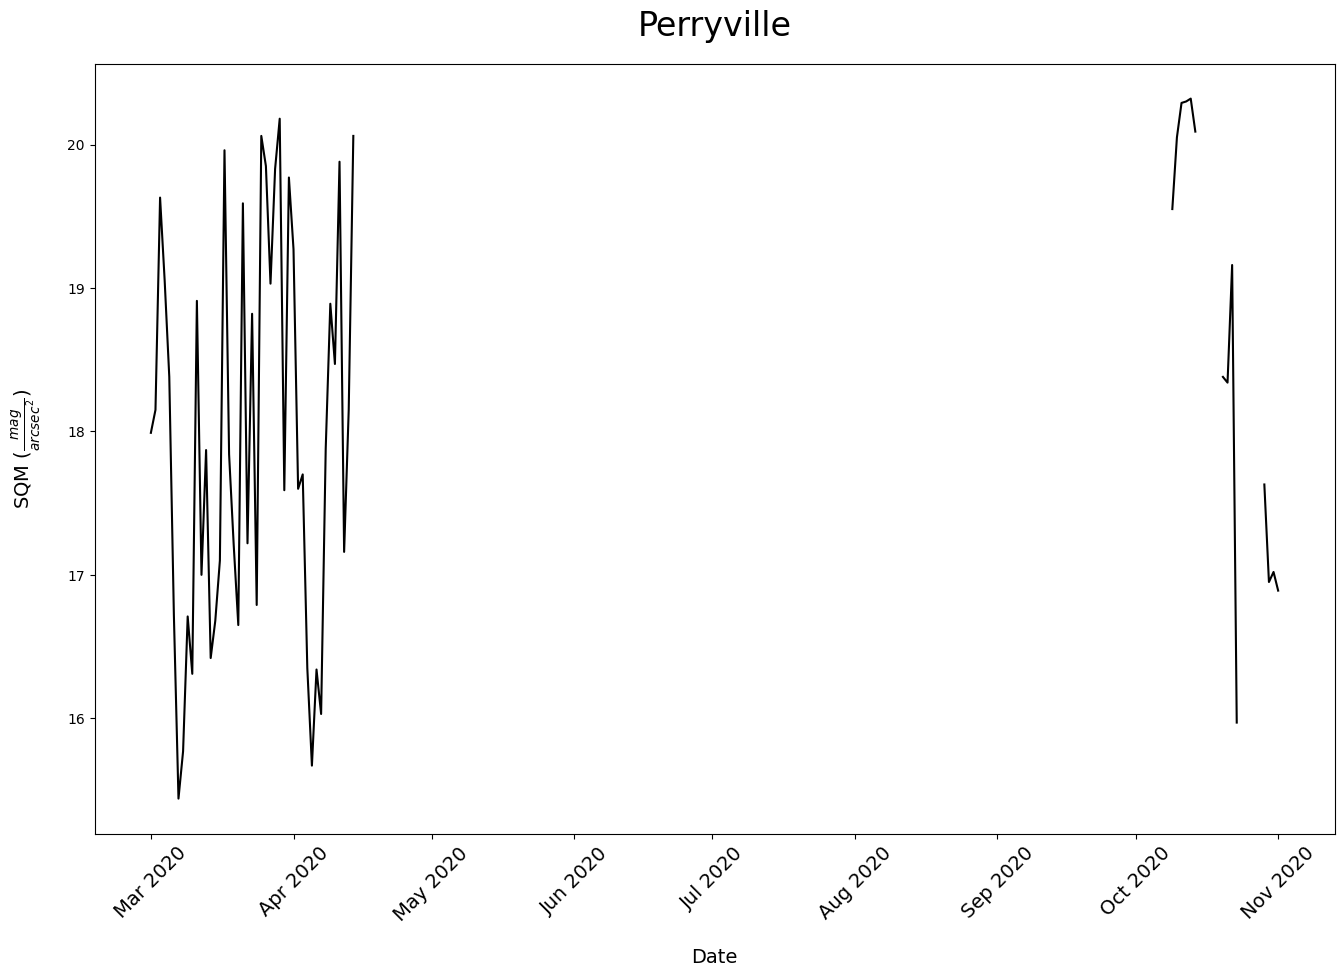

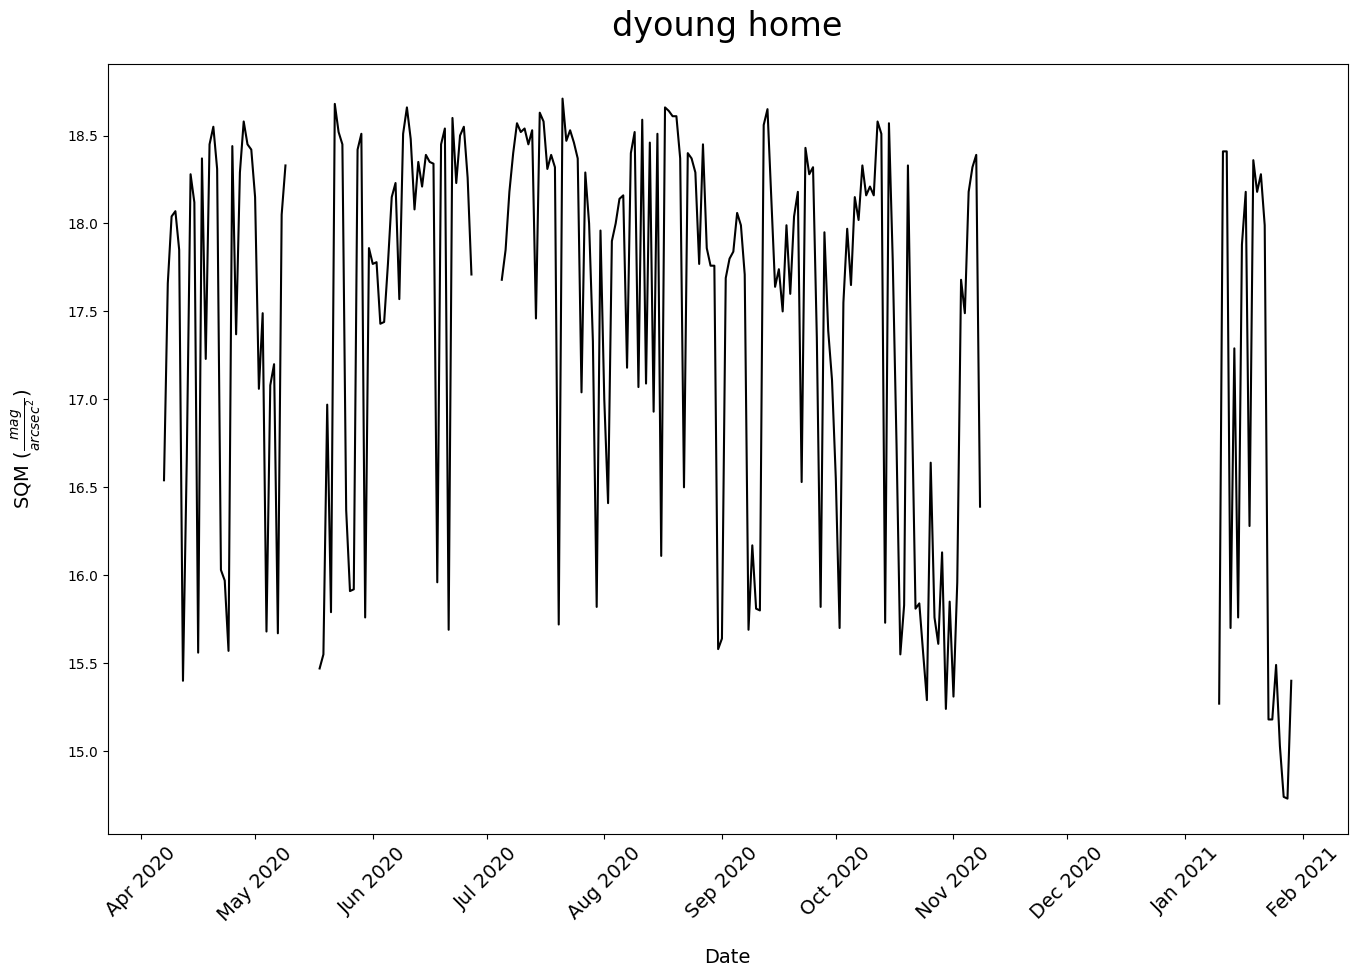

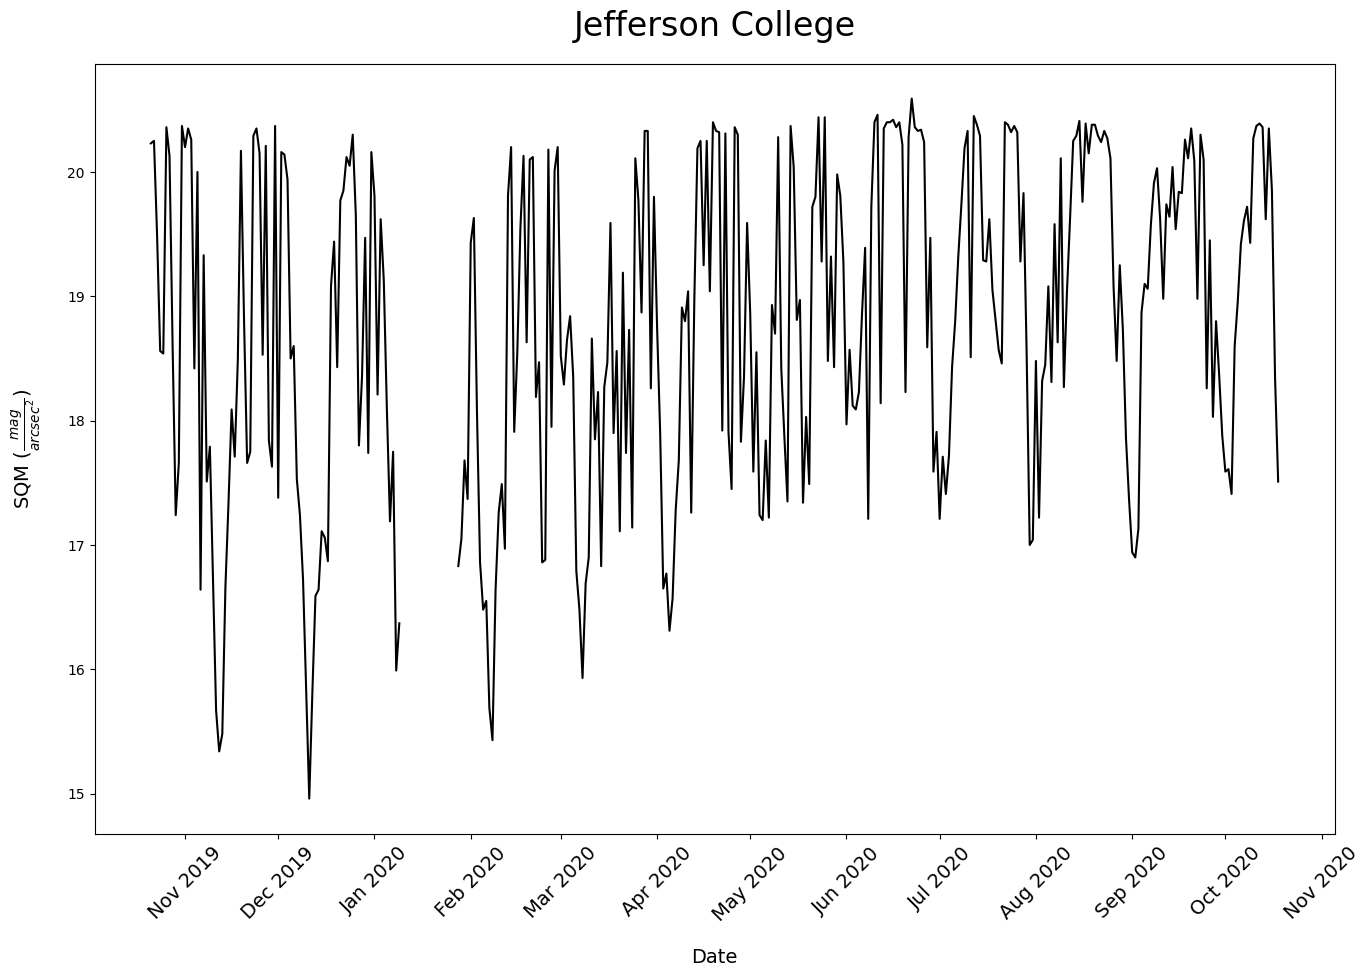

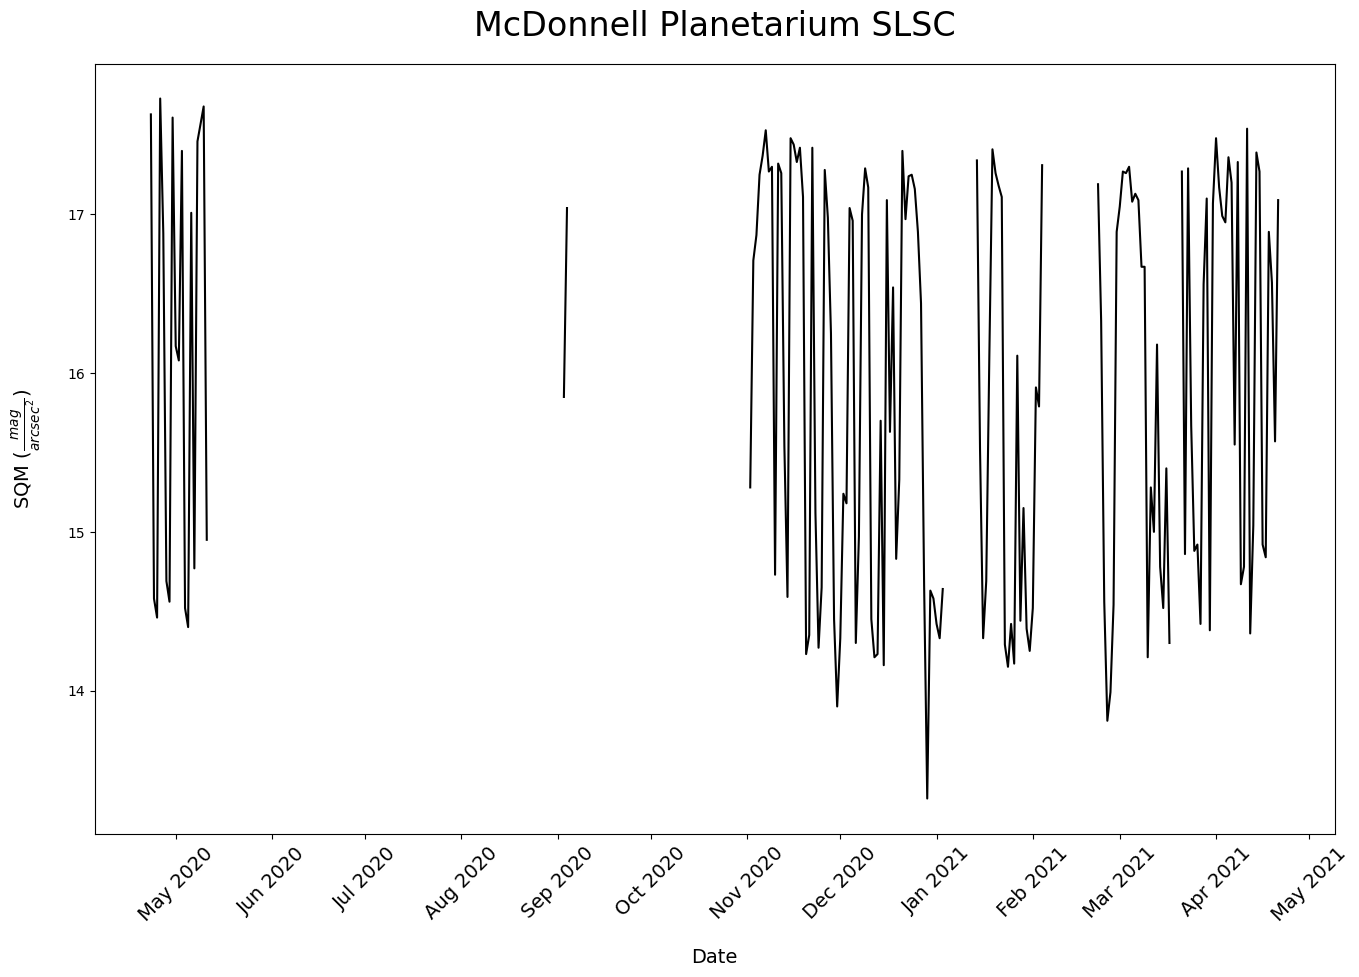

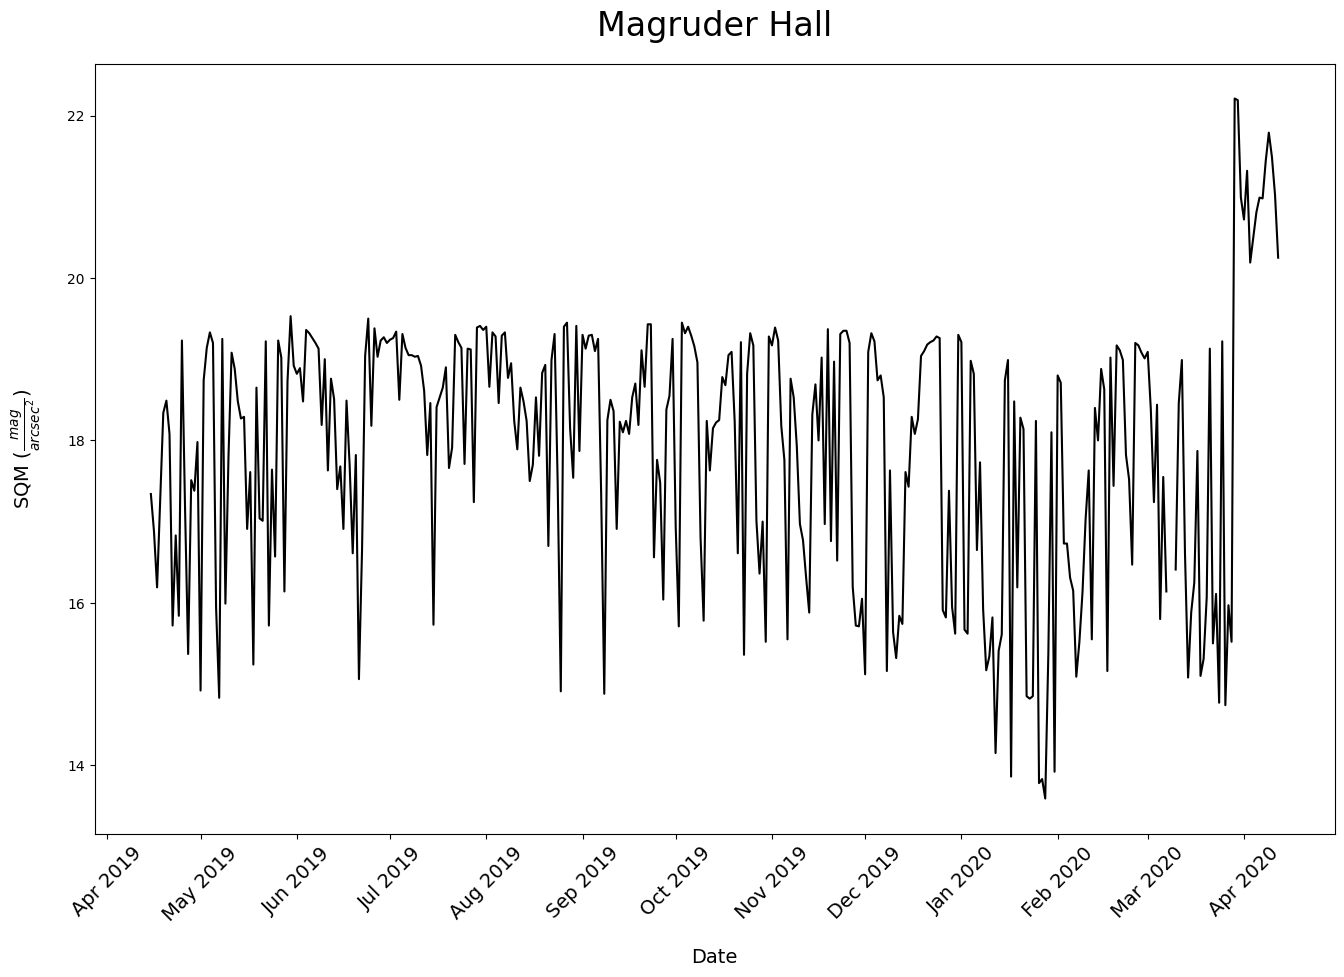

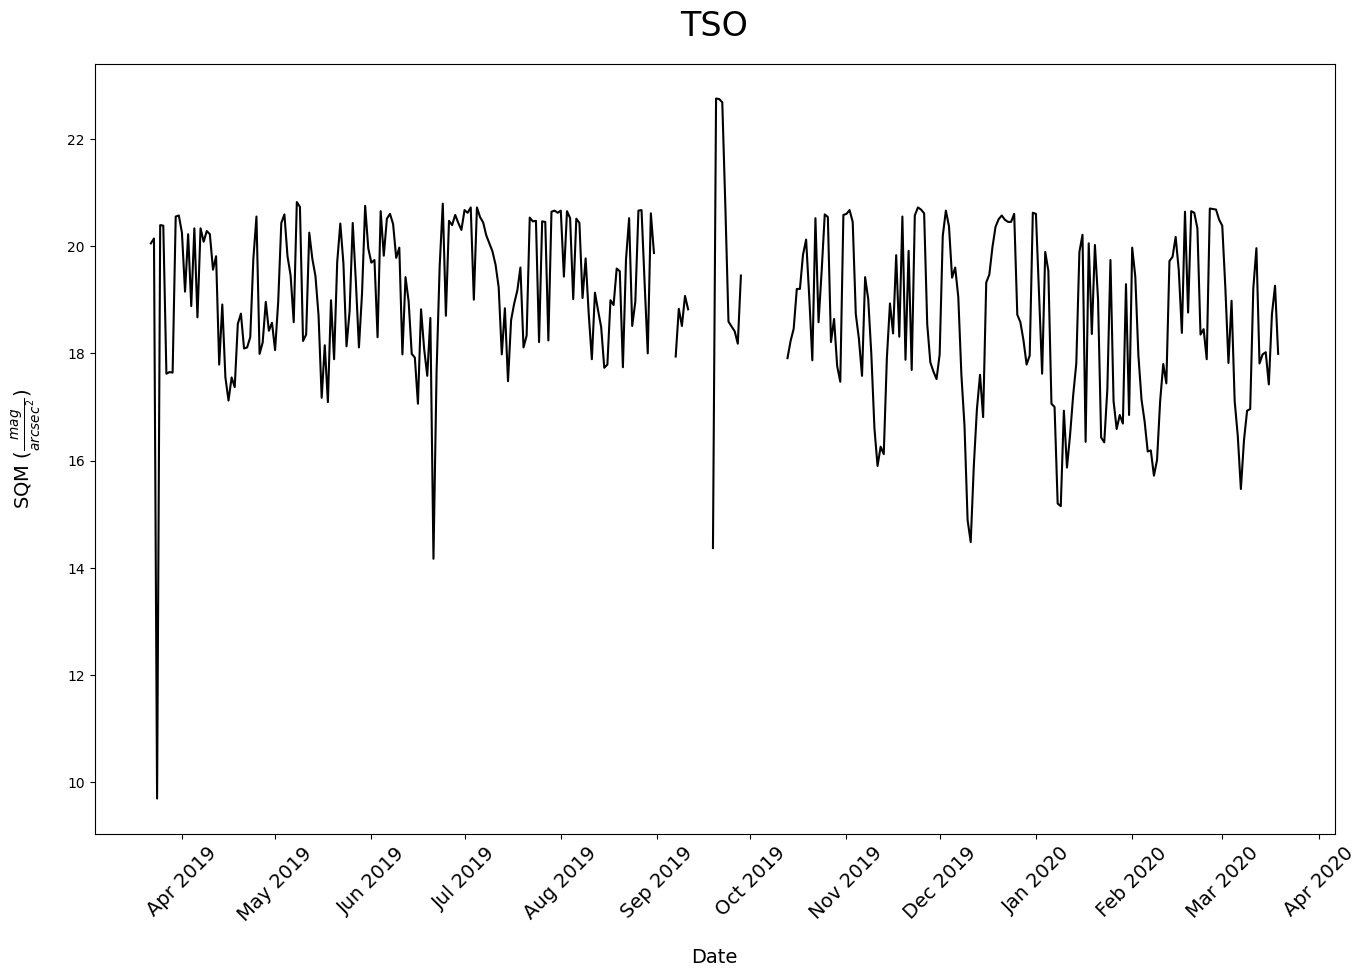

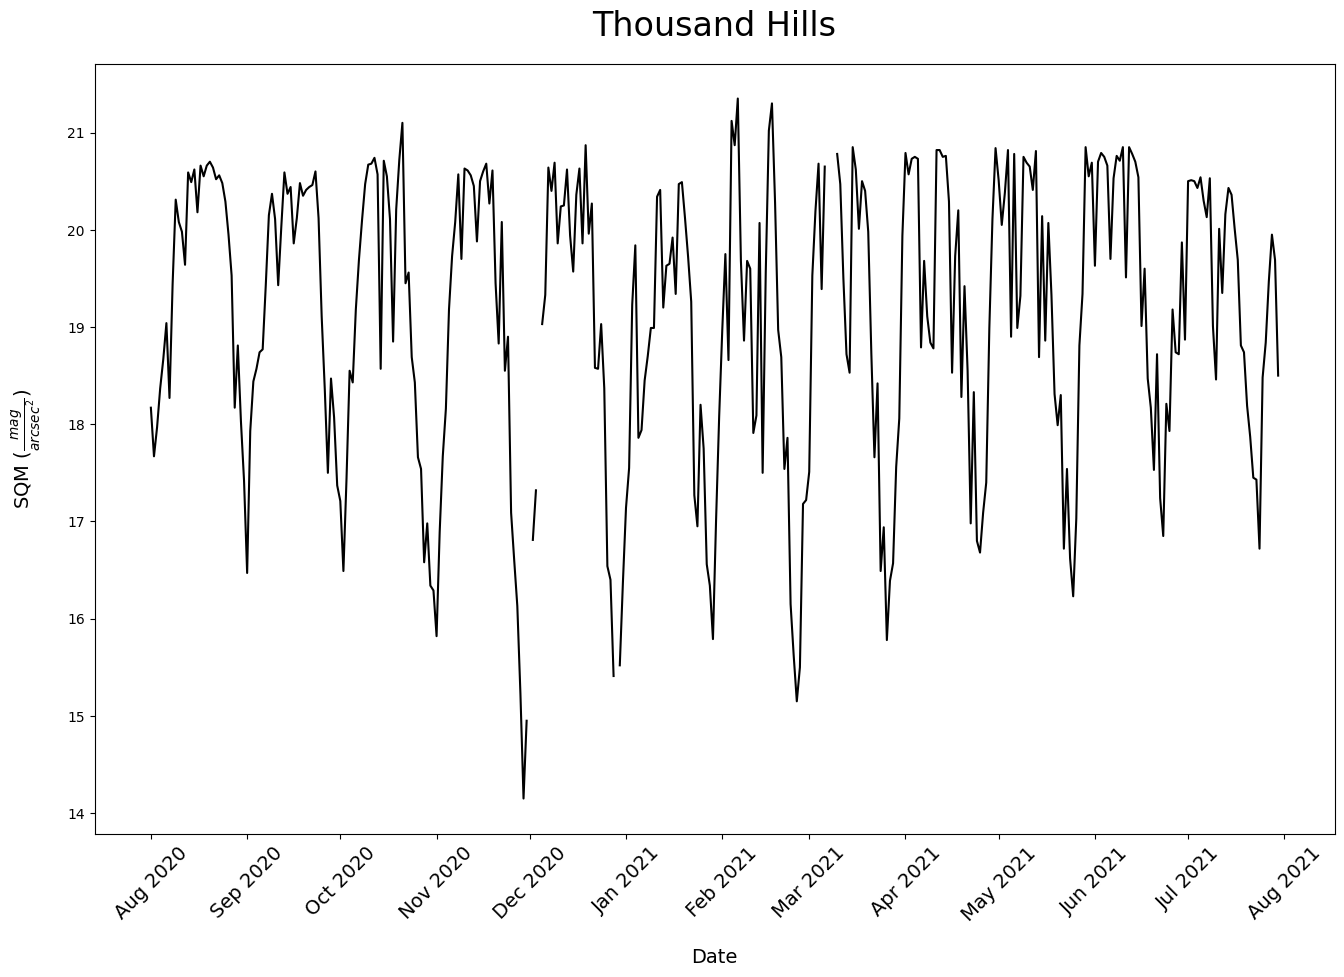

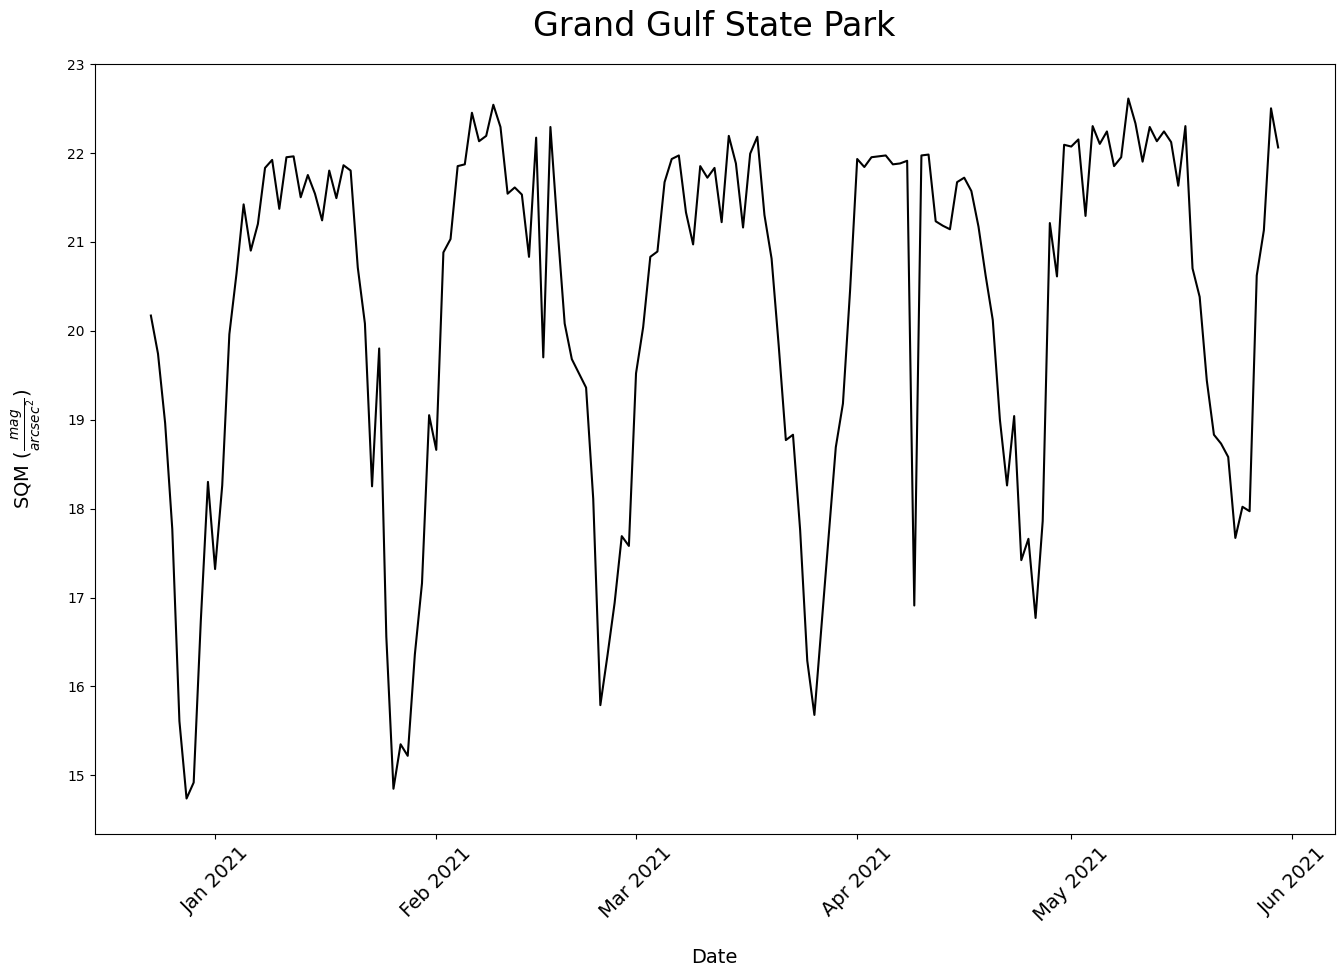

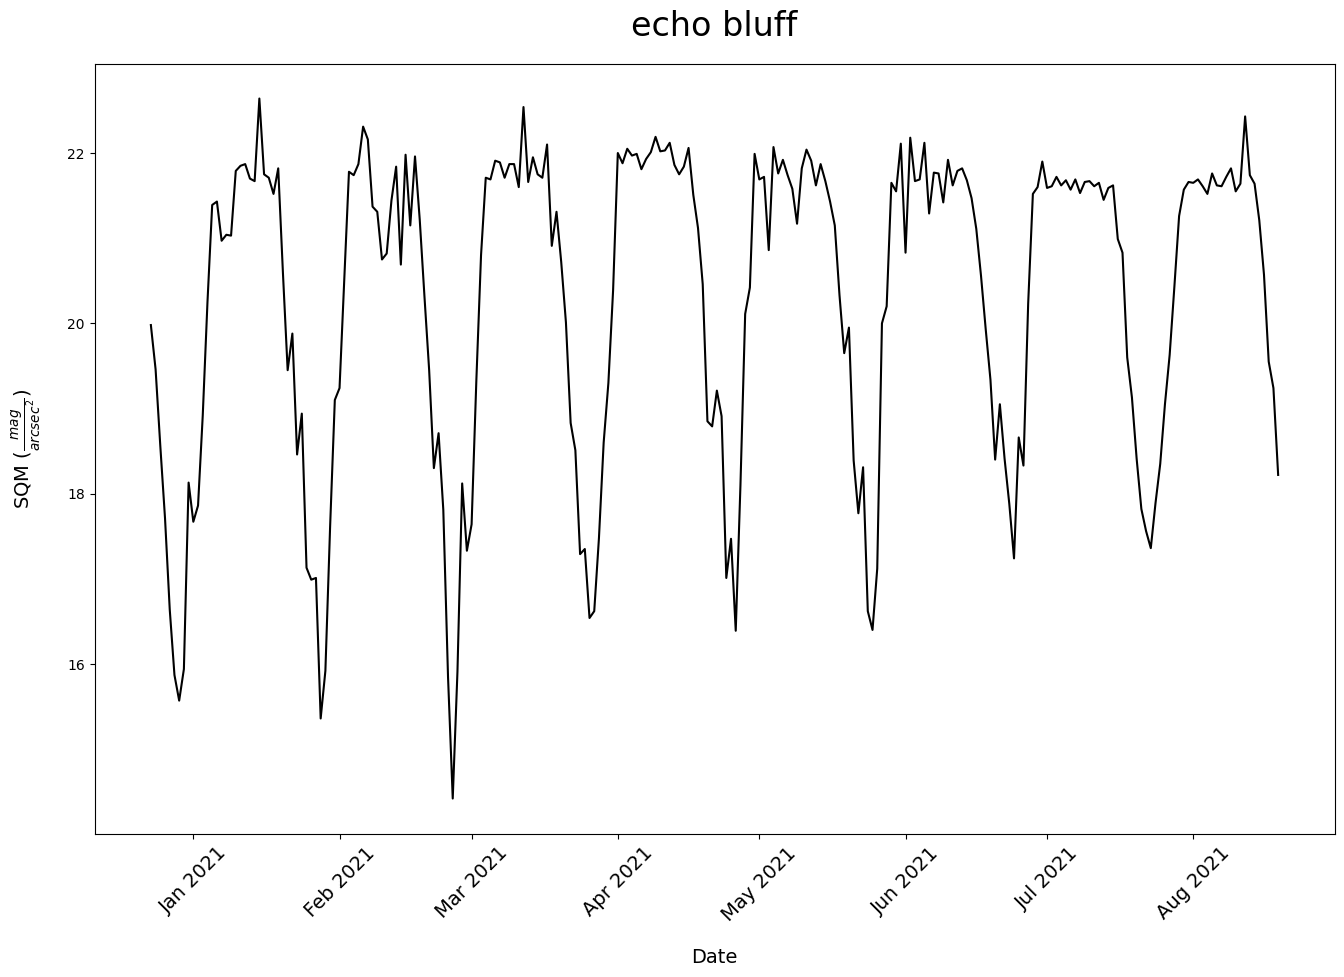

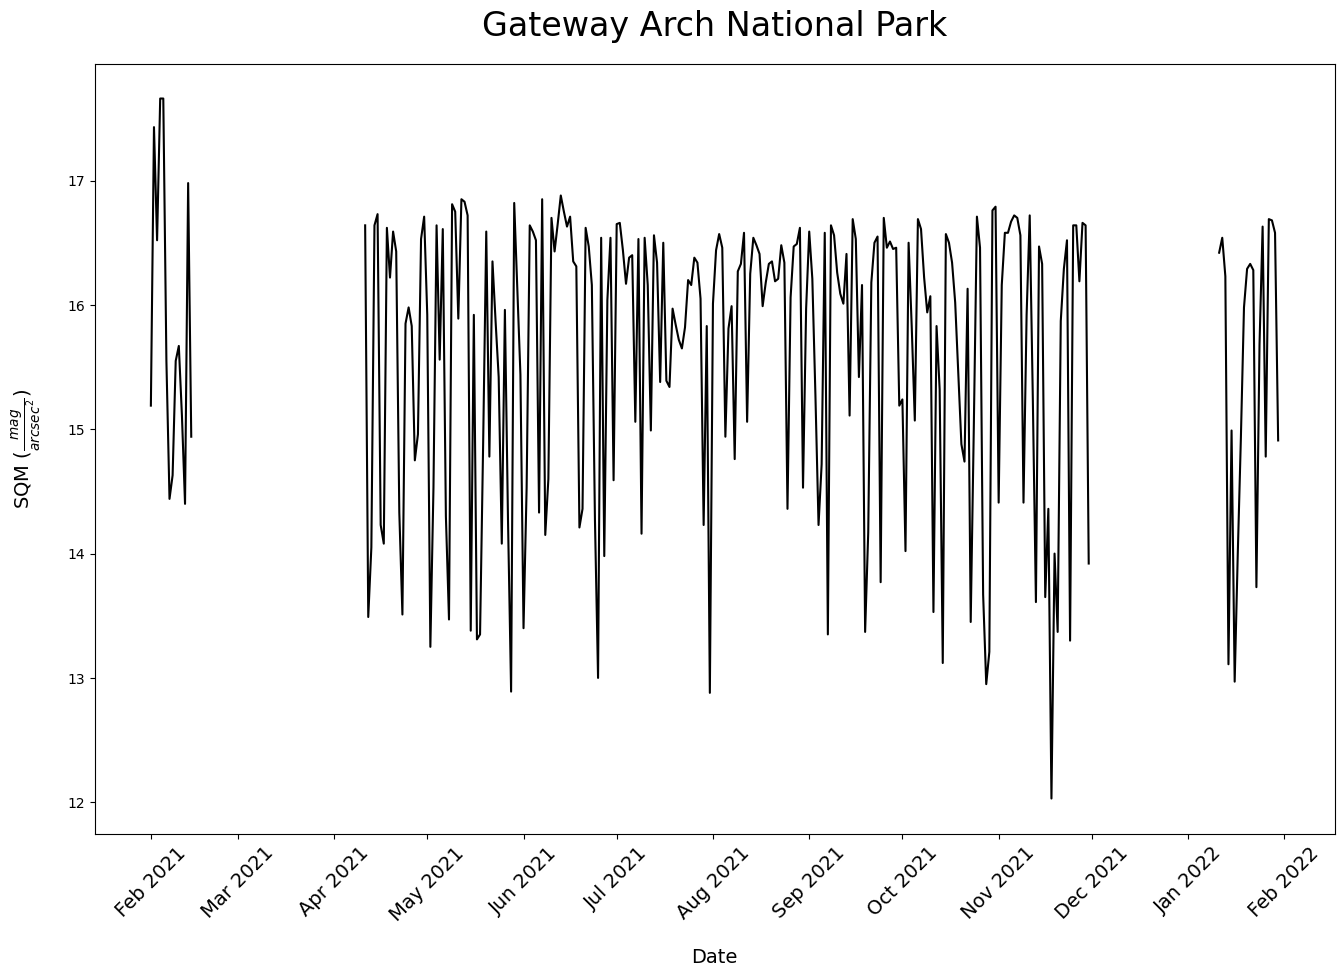

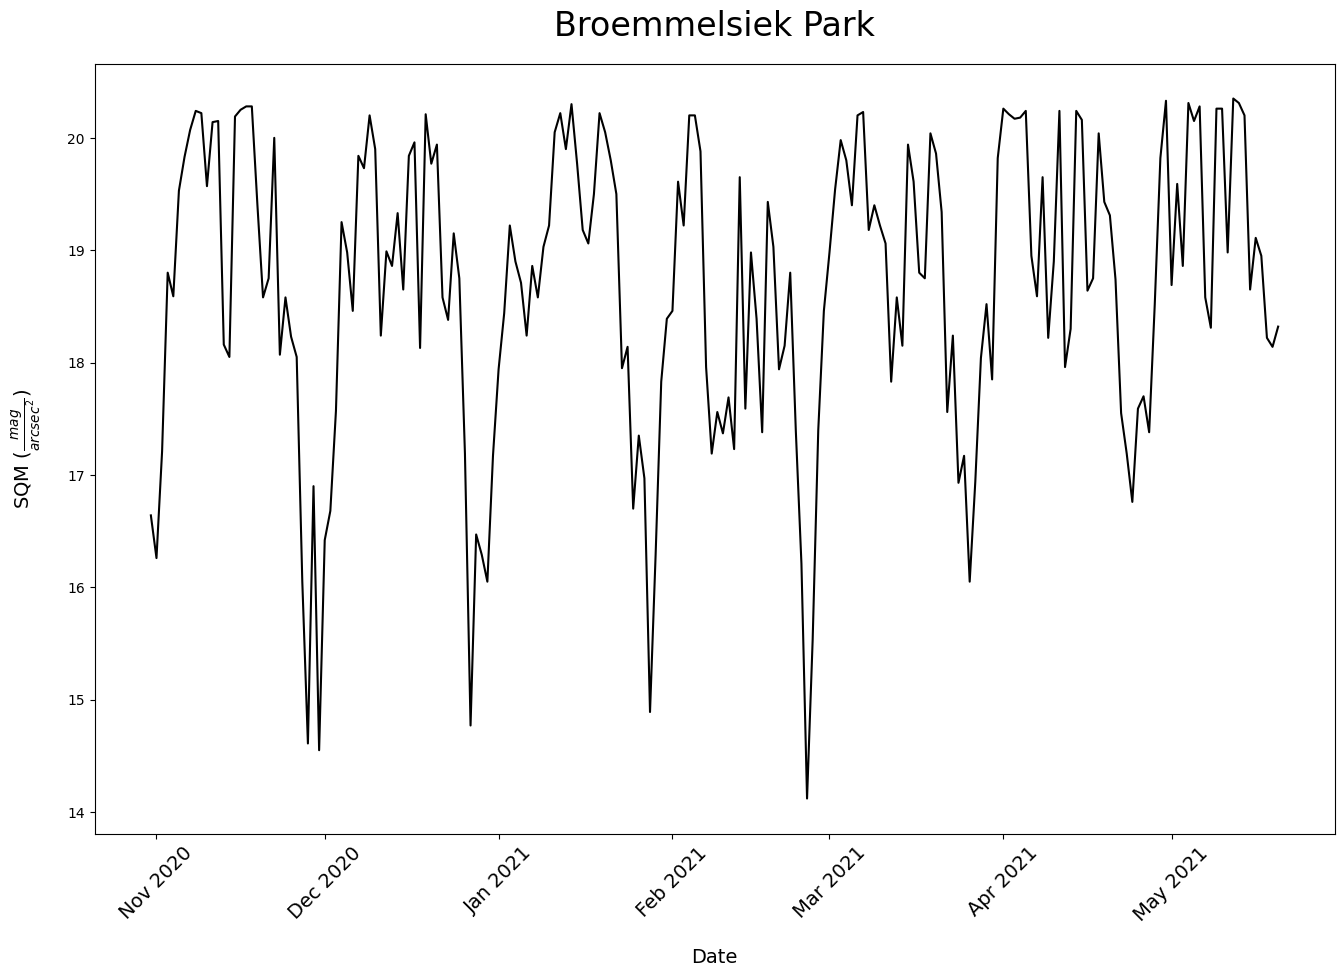

In [54]:
# my_locs = ["Broemmelsiek Park"]

for location in my_locs:  
    
    data_tab_directory = "Combined Data Tables"
    files = os.listdir(data_tab_directory)
    %matplotlib inline

    # Filter only CSV files containing the desired location in their filename
    location = location
    csv_filenames = [file for file in files if file.endswith('.csv') and location.replace(' ', '_') in file]

    for df_filename in csv_filenames:
        df_path = os.path.join("Combined Data Tables", df_filename)
        df = pd.read_csv(df_path, low_memory=False)

        plot_avgs(df, location = location)
    

In [13]:
# ## # Filter out rows where 'Night Date' is later than '09/20/2021'
# # #df = df[df['Night Date'] <= '2021-05-20']

# ## # Save the modified DataFrame to the same file path
# ## df.to_csv(df_path, index=False)

### 2) Make Night Plots

In [14]:
# Import the required packages
import numpy as np
from scipy.fft import fft, rfft
from scipy.fft import fftfreq, rfftfreq
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
%matplotlib inline

116


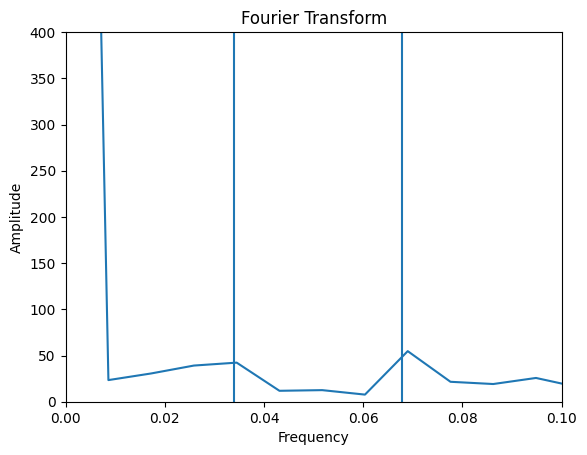

In [15]:
import os
import pandas as pd
import numpy as np
from scipy.fft import fft
import matplotlib.pyplot as plt

# Perform Fourier analysis
def fourier_analysis(data, time_column, signal_column):

    # Select data between 11:30 and 12:30
    window_start = "11:50:00"
    window_end = "12:10:00"
    window_df = data[(data['Time'] >= window_start) & (data['Time'] <= window_end)]
    window_df = window_df.dropna(subset=['SQM'])

    # Calculate the average signal during the specified window
    signal = window_df[signal_column].dropna().astype(float)
    avg_signal = np.mean(signal)

    # Use the midnight data for other calculations
    midnight_df = data[data['Time'] == "00:00:00"][0:365]
    midnight_df = midnight_df.dropna(subset=['SQM'])[0:365]
    midnight_signal = midnight_df[signal_column].dropna().astype(float)

    # Combine the average signal from the window with the midnight signal
    combined_signal = np.append(midnight_signal, avg_signal)

    # Calculate Fourier Transform
    N = len(combined_signal)
    print(N)
    time_diff = np.diff(midnight_df[time_column].astype(float))  # calculate time differences in Julian Date
    mean_sampling_rate = 1 / np.mean(time_diff)  # estimate mean sampling rate
    T = 1 / mean_sampling_rate
    xf = np.fft.fftfreq(N, T)[:N // 2]
    yf = np.fft.fft(combined_signal)[:N // 2]

    return xf, np.abs(yf)

# Define my_locs here
my_locs = ['Rolla', 'MAC', 'SEMO', 'Timberlane', 'Ozark', 'Ozark_II', 'Perryville', 'Overland', 'Hillsboro', 
           'Science Center', 'Magruder Hall', 'MG Hall', 'TSO', 'Thousand Hills', 'Grand Gulf', 'echo bluff', 
           'Jefferson Arch', 'Broemmelsiek Park']

my_locs = ['Timberlane']

for location in my_locs:  
    data_tab_directory = "Combined Data Tables"
    files = os.listdir(data_tab_directory)
    
    # Filter only CSV files containing the desired location in their filename
    location_replaced = location.replace(' ', '_')
    csv_filenames = [file for file in files if file.endswith('.csv') and location_replaced in file]

    for df_filename in csv_filenames:
        df_path = os.path.join(data_tab_directory, df_filename)
        df = pd.read_csv(df_path, low_memory=False)
        
        # Assuming Julian Date column is named 'Julian Date'
        xf, yf = fourier_analysis(df, 'Julian Date', 'SQM')

        # Plot the Fourier Transform
        plt.plot(xf, yf)
        plt.title('Fourier Transform')
        plt.xlabel('Frequency')
        plt.ylabel('Amplitude')
        plt.xlim(0, .1)
        plt.ylim(0, 400)

        plt.axvline(x= 1/2* 0.067797)
        plt.axvline(x= 0.067797)
  
        plt.show()


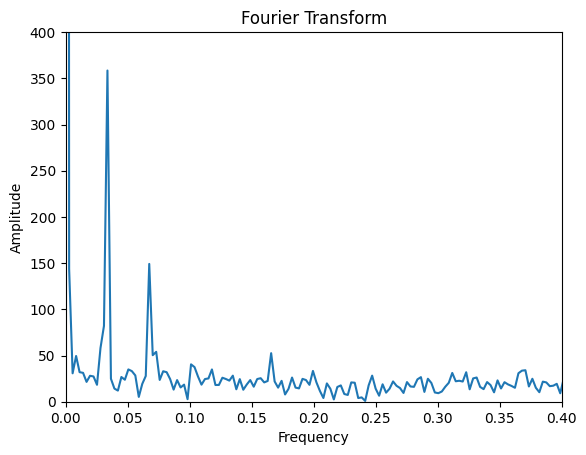

In [16]:
import os
import pandas as pd
import numpy as np
from scipy.fft import fft
import matplotlib.pyplot as plt

# Perform Fourier analysis
def fourier_analysis(data, time_column, signal_column):

    # Select data between 11:30 and 12:30
    window_start = "11:00:00"
    window_end = "1:00:00"
    window_df = data[(data['Time'] >= window_start) & (data['Time'] <= window_end)]
    window_df = window_df.dropna(subset=['SQM'])

    # Calculate the average signal during the specified window
    signal = window_df[signal_column].dropna().astype(float)
    avg_signal = np.mean(signal)

    # Use the midnight data for other calculations
    midnight_df = data[data['Time'] == "00:00:00"]
    midnight_df = midnight_df.dropna(subset=['SQM'])
    midnight_signal = midnight_df[signal_column].dropna().astype(float)

    # Combine the average signal from the window with the midnight signal
    combined_signal = np.append(midnight_signal, avg_signal)

    # Calculate Fourier Transform
    N = len(combined_signal)
    time_diff = np.diff(midnight_df[time_column].astype(float))  # calculate time differences in Julian Date
    mean_sampling_rate = 1 / np.mean(time_diff)  # estimate mean sampling rate
    T = 1 / mean_sampling_rate
    xf = np.fft.fftfreq(N, T)[:N // 2]
    yf = np.fft.fft(combined_signal)[:N // 2]

    return xf, np.abs(yf)

# Define my_locs here
my_locs = ['Rolla', 'MAC', 'SEMO', 'Timberlane', 'Ozark', 'Ozark_II', 'Perryville', 'Overland', 'Hillsboro', 
           'Science Center', 'Magruder Hall', 'MG Hall', 'TSO', 'Thousand Hills', 'Grand Gulf', 'echo bluff', 
           'Jefferson Arch', 'Broemmelsiek Park']

my_locs = ['Grand Gulf']

for location in my_locs:  
    data_tab_directory = "Combined Data Tables"
    files = os.listdir(data_tab_directory)
    
    # Filter only CSV files containing the desired location in their filename
    location_replaced = location.replace(' ', '_')
    csv_filenames = [file for file in files if file.endswith('.csv') and location_replaced in file]

    for df_filename in csv_filenames:
        df_path = os.path.join(data_tab_directory, df_filename)
        df = pd.read_csv(df_path, low_memory=False)
        
        # Assuming Julian Date column is named 'Julian Date'
        xf, yf = fourier_analysis(df, 'Julian Date', 'SQM')

        # Plot the Fourier Transform
        plt.plot(xf, yf)
        plt.title('Fourier Transform')
        plt.xlabel('Frequency')
        plt.ylabel('Amplitude')
        plt.xlim(0, .4)
        plt.ylim(0, 400)
        plt.show()

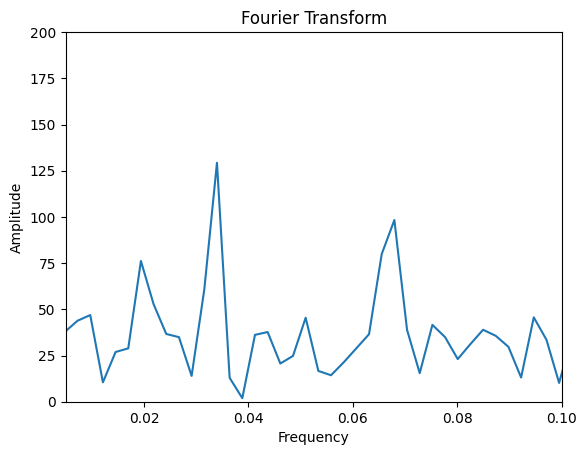

In [17]:
import os
import pandas as pd
import numpy as np
from scipy.fft import fft
import matplotlib.pyplot as plt

# Perform Fourier analysis
def fourier_analysis(data, time_column, signal_column):

    nightly_df = data[data['Time'] == "00:00:00"]
    nightly_df = nightly_df.dropna(subset=['SQM'])

    signal = nightly_df[signal_column].dropna().astype(float)
    time_diff = np.diff(nightly_df[time_column].astype(float))  # calculate time differences in Julian Date
    # print("Time differences:", time_diff)
    mean_sampling_rate = 1 / np.mean(time_diff)  # estimate mean sampling rate
    # print("Mean sampling rate:", mean_sampling_rate)
    N = len(signal)
    T = 1 / mean_sampling_rate
    # print("Number of samples:", N)
    # print("Sampling period:", T)

    # print("First few signal values:", signal[:10])

    xf = np.fft.fftfreq(N, T)[:N // 2]
    yf = np.fft.fft(signal)[:N // 2]
    return xf, np.abs(yf)

# Define my_locs here
my_locs = ['Rolla', 'MAC', 'SEMO', 'Timberlane', 'Ozark', 'Ozark_II', 'Perryville', 'Overland', 'Hillsboro', 
           'Science Center', 'Magruder Hall', 'MG Hall', 'TSO', 'Thousand Hills', 'Grand Gulf', 'echo bluff', 
           'Jefferson Arch', 'Broemmelsiek Park']

my_locs = ['Rolla']

# my_locs = ['TSO']

for location in my_locs:  
    data_tab_directory = "Combined Data Tables"
    files = os.listdir(data_tab_directory)
    
    # Filter only CSV files containing the desired location in their filename
    location_replaced = location.replace(' ', '_')
    csv_filenames = [file for file in files if file.endswith('.csv') and location_replaced in file]

    for df_filename in csv_filenames:
        df_path = os.path.join(data_tab_directory, df_filename)
        df = pd.read_csv(df_path, low_memory=False)
        
        # Assuming Julian Date column is named 'Julian Date'
        xf, yf = fourier_analysis(df, 'Julian Date', 'SQM')

        # Plot the Fourier Transform
        plt.plot(xf, yf)
        plt.title('Fourier Transform')
        plt.xlabel('Frequency')
        plt.ylabel('Amplitude')
        plt.xlim(0.005, .1)
        plt.ylim(0, 200)
        plt.show()


Time interval: 86890.90909090909
Sampling rate: 1.1508683825068006e-05
FFT result: [ 7.25063000e+03+0.00000000e+00j -1.15487690e+02+5.36727142e+01j
 -1.34652589e+01+7.65969412e-01j -2.90668656e+01-1.73055290e+01j
 -1.39735340e+01+7.71733731e+00j -1.26321457e+01-9.88154828e+00j
  1.67433334e+00-1.54492647e+01j -9.80664692e+00+5.20197830e+00j
 -9.73972685e+00-2.32958815e+00j  1.59363784e+00-1.07209328e+01j
 -1.30597061e+01+4.33359548e+01j -4.93518048e+01+3.56235958e+01j
 -1.77837190e+02+3.06079439e+02j  4.93958427e+00+3.96063825e+01j
  1.81198563e+01-1.87380070e+00j  7.30880252e+00-1.48990240e+00j
 -6.98857769e+00-8.84571702e+00j -7.01708150e+00-4.94895203e+00j
 -5.59407519e-01-2.68881829e+01j -1.75578487e+01-9.77645669e+00j
 -1.52206573e+01+1.45238654e+01j  5.68768982e+00-1.78493274e-01j
  3.00738430e+01+6.12476238e+00j -1.87828518e+00+2.56932831e+01j
  1.00600962e+02+1.34874720e+02j  2.27813643e+01-3.03159435e+01j
 -1.39041688e+01-3.06981119e+01j -4.89278536e+00+1.84985354e+00j
 -1.156

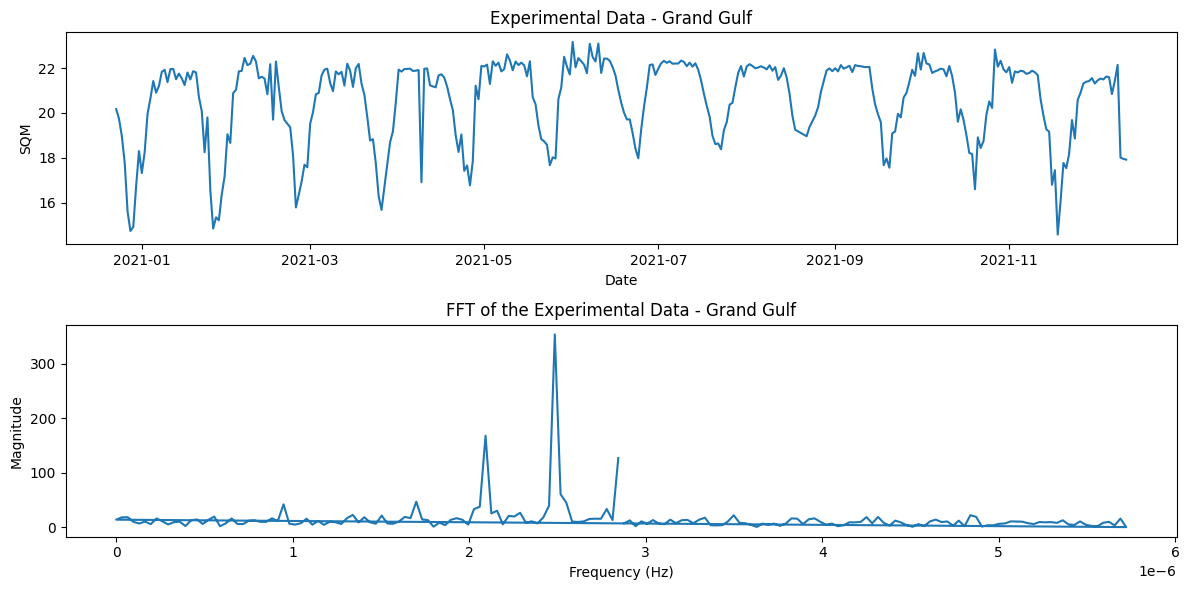

In [18]:
# SAVE 

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define my_locs here
my_locs = ['Grand Gulf']

# Iterate through each location
for location in my_locs:  
    data_tab_directory = "Combined Data Tables"
    files = os.listdir(data_tab_directory)
    
    # Filter only CSV files containing the desired location in their filename
    location_replaced = location.replace(' ', '_')
    csv_filenames = [file for file in files if file.endswith('.csv') and location_replaced in file]

    # Iterate through each file for the location
    for df_filename in csv_filenames:
        df_path = os.path.join(data_tab_directory, df_filename)
        df = pd.read_csv(df_path, low_memory=False)

        # Convert 'Night Date' column to datetime format
        df['Night Date'] = pd.to_datetime(df['Night Date'])

        # Filter for nightly data at midnight
        nightly_df = df[df['Time'] == "00:00:00"]
        nightly_df = nightly_df.dropna(subset=['SQM'])

        # Extract the data
        sqms = nightly_df['SQM']
        date = nightly_df["Night Date"]

        # Compute the time interval (assuming uniform sampling)
        time_interval = (date.iloc[-1] - date.iloc[0]).total_seconds() / len(sqms)  # in seconds
        print("Time interval:", time_interval)

        # Compute the sampling rate
        sampling_rate = 1 / time_interval  # samples per second
        print("Sampling rate:", sampling_rate)

        # Compute the FFT
        fft_result = np.fft.fft(sqms)

        # Frequency axis
        n = len(sqms)
        T = 1 / sampling_rate
        frequencies = np.fft.fftfreq(n, T)[:n//2]
        fft_result_shifted = np.fft.fftshift(fft_result)
        fft_result_shifted = fft_result_shifted[:n//2]
        frequencies_shifted = np.fft.fftshift(frequencies)

        print("FFT result:", fft_result)
        print("Frequencies:", frequencies)

        # Plot the original signal and its FFT
        plt.figure(figsize=(12, 6))

        plt.subplot(2, 1, 1)
        plt.plot(date, sqms)
        plt.title(f'Experimental Data - {location}')
        plt.xlabel('Date')
        plt.ylabel('SQM')

        plt.subplot(2, 1, 2)
        plt.plot(frequencies_shifted, np.abs(fft_result_shifted))
        plt.title(f'FFT of the Experimental Data - {location}')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Magnitude')

        plt.tight_layout()
        plt.show()
